In [108]:
import warnings
warnings.filterwarnings('ignore')
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
import scipy.stats as stats
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.feature_selection import SelectKBest, RFE, f_regression
import viz
import os
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
#Access Stored Data
np.random.seed(4)

# Acquire

In [2]:
def new_wine_data():
    '''
    This function queries data from two data.world datasets and reads
    them into pandas DataFrames. One is for red wine 
    (https://query.data.world/s/hn4uhqtyxklbrtbdbxmku47vueahfw?dws=00000)
    The other is for white wine.
    (https://query.data.world/s/r2mrliiyey6g2rn54wqmx3pvcylez7?dws=00000)
    The function then adds a column 'red_wine' to each df to designate 
    whether each wine is white or red. Then the two dfs are concatenated
    into a single dataframe which is returned
    
    Arguments: None
    
    Returns: DataFrame of properties queried
    '''
    
    # Read in red wine data from data.world.
    df_r = pd.read_csv(
        'https://query.data.world/s/572bfogx33kophnqyp3lwse7pguchi?dws=00000')
    
    # Read in white wine data from data.world.
    df_w = pd.read_csv(
        'https://query.data.world/s/r2mrliiyey6g2rn54wqmx3pvcylez7?dws=00000')
    
    # Add 'is_red' column to each df'
    df_r['is_red'] = 1
    df_w['is_red'] = 0
    
    # Concatenate two dfs
    df = pd.concat([df_r, df_w])
    
    return df


def get_wine_data():
    '''
    This function checks to see if there is a local version of 'wine.csv'.
    If it finds one, it reads it into a DataFrame and returns that df.
    If it does not find one, it runs 'new_wine_data()' to pull the data
    from the host and convert to a df. Then it writes that df to a local
    file 'wine.csv' and returns the df. Function relies
    on other functions in the wrangle.py module.
    '''
    if os.path.isfile('wine.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('wine.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_wine_data()
        
        # Cache data
        df.to_csv('wine.csv')
        
    return df

In [3]:
df = new_wine_data()

In [4]:
df.index.is_unique
df.index.duplicated()
df = df.loc[~df.index.duplicated(), :]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  is_red                4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 535.7 KB


In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        7.280063          0.359076     0.303949        5.246121   
std         1.400082          0.175912     0.144303        4.661065   
min         3.800000          0.085000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.900000   
50%         7.000000          0.310000     0.300000        2.800000   
75%         7.800000          0.440000     0.370000        7.800000   
max        15.900000          1.580000     1.230000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.059166            29.098612            106.603716     0.994797   
std       0.037585            17.932544             57.104232     0.003088   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.039000            15.000000             60.000000     0.992340   
50%       0.050000            27.000000            110.000000     0.995200   
75%       0.073000            40.000000            147.000000     0.997050   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality       is_red  
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.222366     0.545572    10.559234     5.799918     0.326460  
std       0.161953     0.155464     1.206790     0.851181     0.468966  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.440000     9.500000     5.000000     0.000000  
50%       3.210000     0.520000    10.400000     6.000000     0.000000  
75%       3.320000     0.620000    11.400000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [7]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  is_red  
0         9.4        5       1  
1         9.8        5       1  
2         9.8        5       1  
3         9.8        6       1  
4         9.4        5       1  
...       ...      ...     ...  
4893     11.2        6       0  
4894      9.6        5       0  
4895      9.4        6       0  
4896     12.8        7       0  
4897     11.8        6       0  

[4898 rows x 13 columns]

In [106]:
#Built data dictionary of features and distriptions 
data = {'Attribute':['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol',
                     'quality',
                     'is_red'],
        
'Attribute Discription':
['most acids involved with wine or fixed or nonvolatile (do not evaporate readily)',
                                 
'the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste',
                                
'found in small quantities, citric acid can add freshness and flavor to wines',
                                         
'the amount of sugar remaining after fermentation stops its rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet',
                                
'the amount of salt in the wine','the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine',
                                
'amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine',
                                
'the density of water is close to that of water depending on the percent alcohol and sugar content',
                                
'describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale',
                                
'a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant',
                                
'the percent alcohol content of the wine','(score between 0 and 10)',
'indicated red or white with 1 or 0']}


data = pd.DataFrame.from_dict(data)

In [107]:
data

Attribute                              Attribute Discription
0          fixed acidity  most acids involved with wine or fixed or nonv...
1       volatile acidity  the amount of acetic acid in wine, which at to...
2            citric acid  found in small quantities, citric acid can add...
3         residual sugar  the amount of sugar remaining after fermentati...
4              chlorides                     the amount of salt in the wine
5    free sulfur dioxide  the free form of SO2 exists in equilibrium bet...
6   total sulfur dioxide  amount of free and bound forms of S02; in low ...
7                density  the density of water is close to that of water...
8                     pH  describes how acidic or basic a wine is on a s...
9              sulphates  a wine additive which can contribute to sulfur...
10               alcohol            the percent alcohol content of the wine
11               quality                           (score between 0 and 10)
12                is_red                 indicated red or white with 1 or 0

# Prepare

In [10]:
#created variable for numeral data 
numeric = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol',
                     'quality'
                     ]

In [11]:
#changed is_red to object
df.is_red = df.is_red.astype('O')

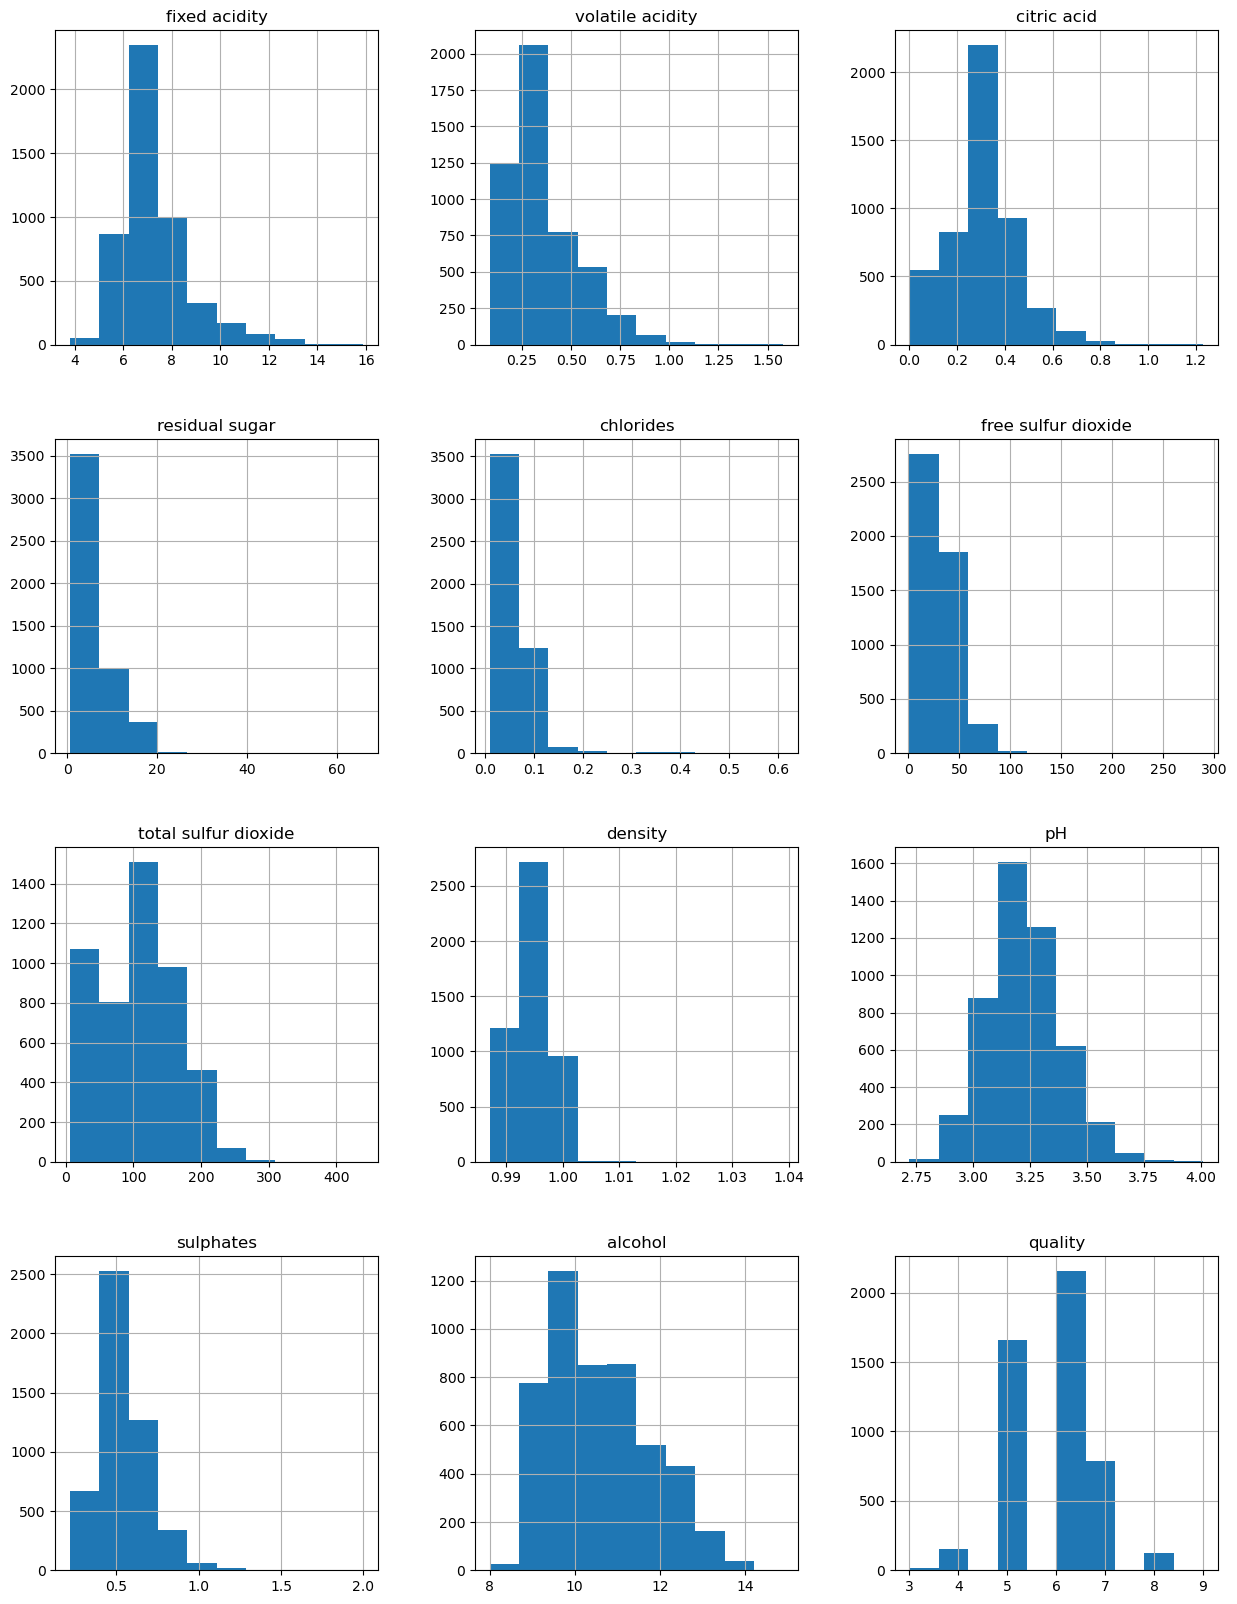

In [12]:
#Hist plot to show distribution of each column in the dataframe
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [13]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        7.280063          0.359076     0.303949        5.246121   
std         1.400082          0.175912     0.144303        4.661065   
min         3.800000          0.085000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.900000   
50%         7.000000          0.310000     0.300000        2.800000   
75%         7.800000          0.440000     0.370000        7.800000   
max        15.900000          1.580000     1.230000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.059166            29.098612            106.603716     0.994797   
std       0.037585            17.932544             57.104232     0.003088   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.039000            15.000000             60.000000     0.992340   
50%       0.050000            27.000000            110.000000     0.995200   
75%       0.073000            40.000000            147.000000     0.997050   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.222366     0.545572    10.559234     5.799918  
std       0.161953     0.155464     1.206790     0.851181  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.440000     9.500000     5.000000  
50%       3.210000     0.520000    10.400000     6.000000  
75%       3.320000     0.620000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

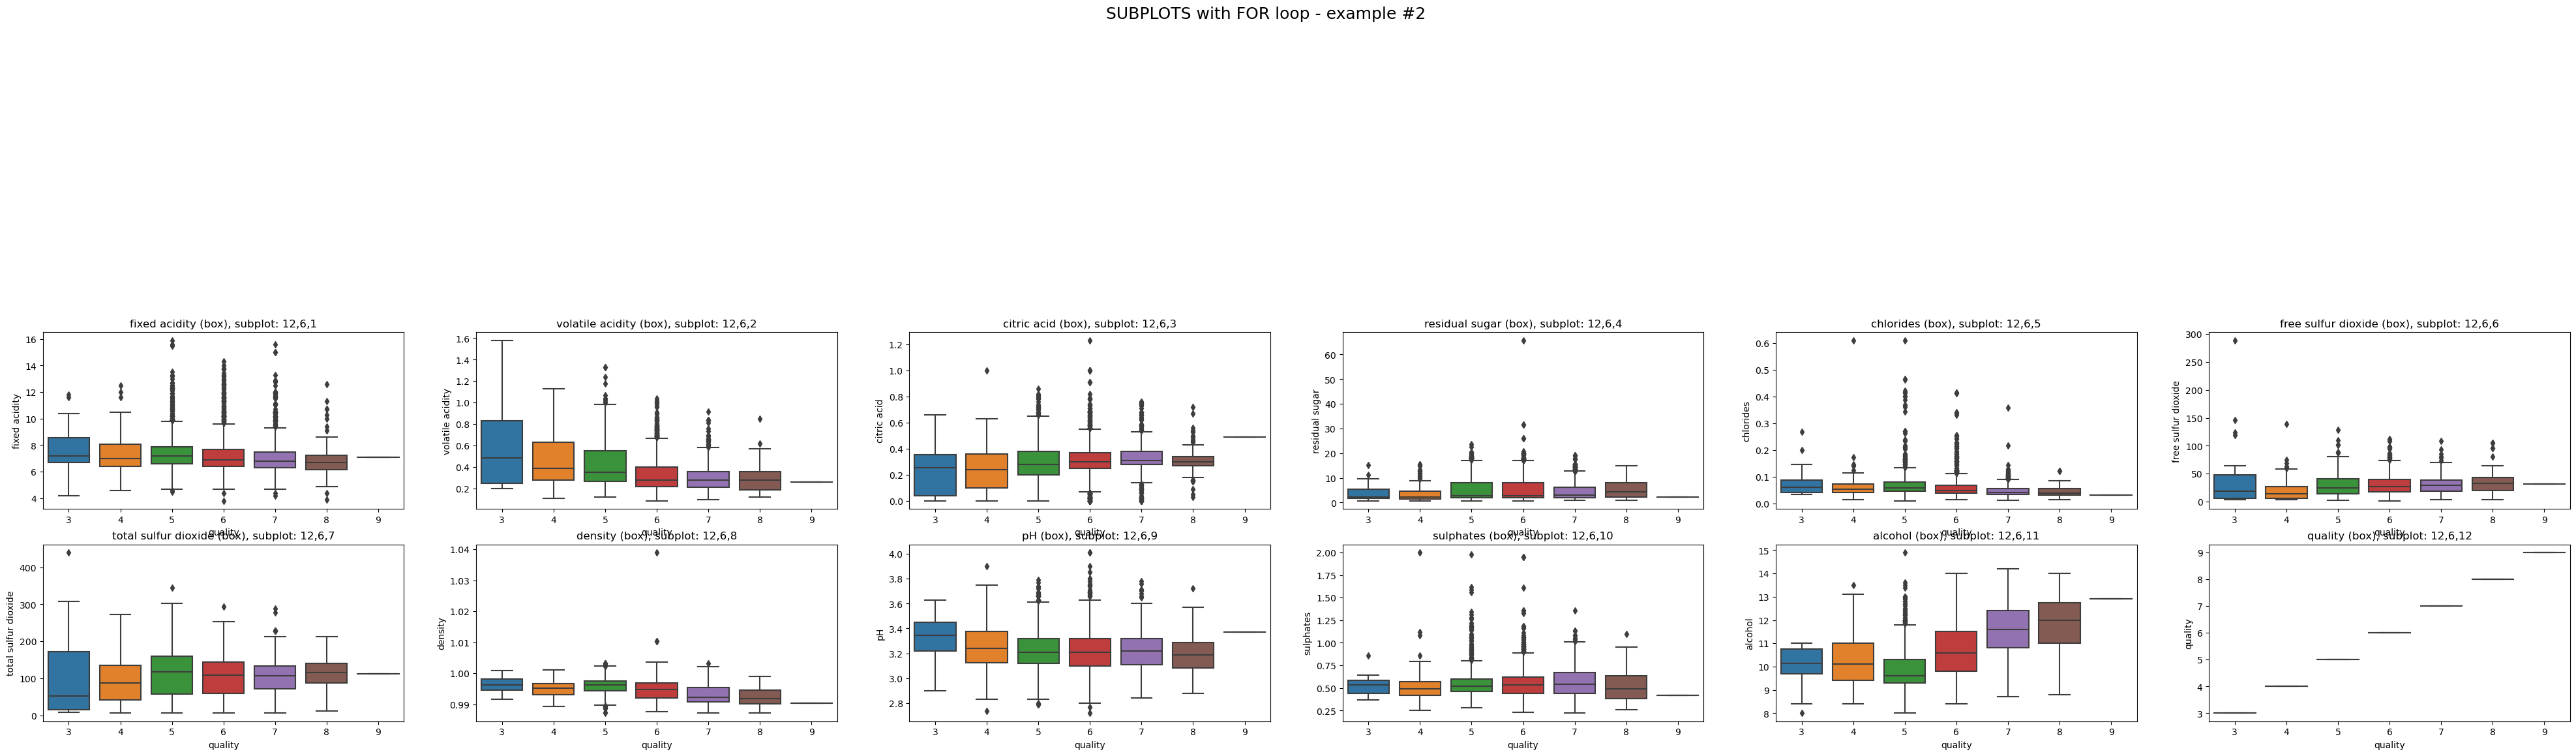

In [14]:
#  Numerical Data
heart_NUM = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol',
                     'quality']

#  plot Numerical Data
a = len(heart_NUM)  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (50,50))
plt.suptitle("SUBPLOTS with FOR loop - example #2", fontsize = 18)

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = df, y = i, x = 'quality')
    c = c + 1

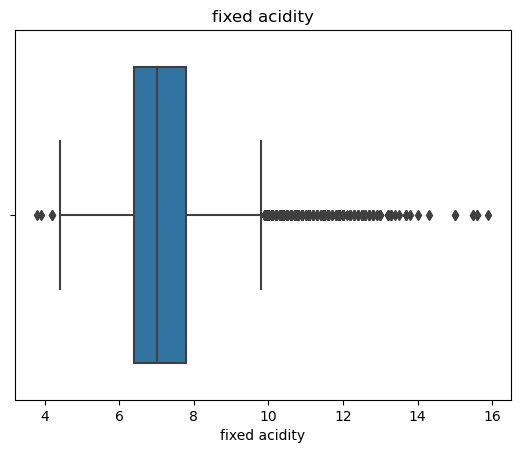

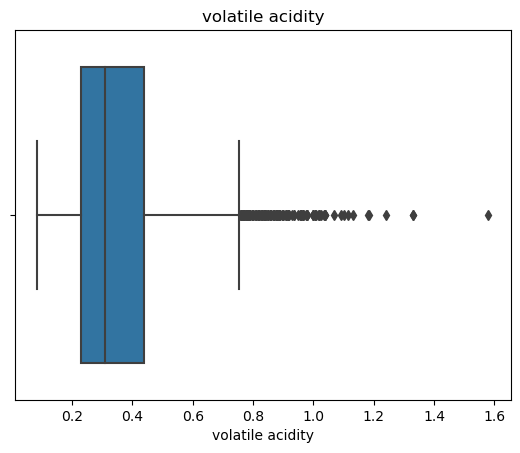

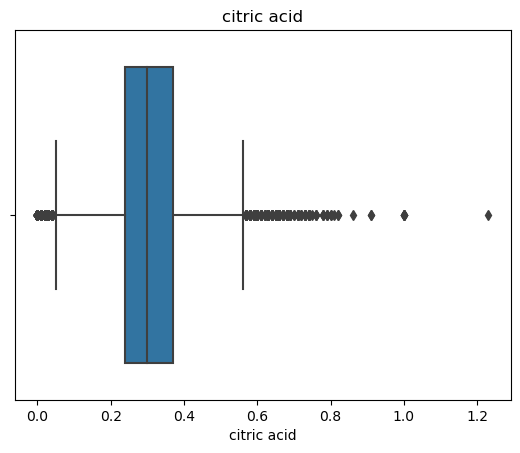

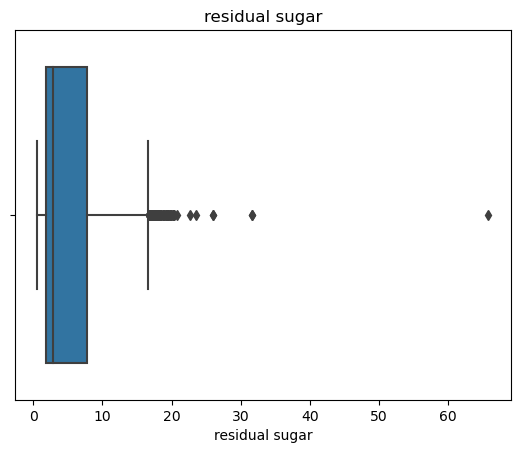

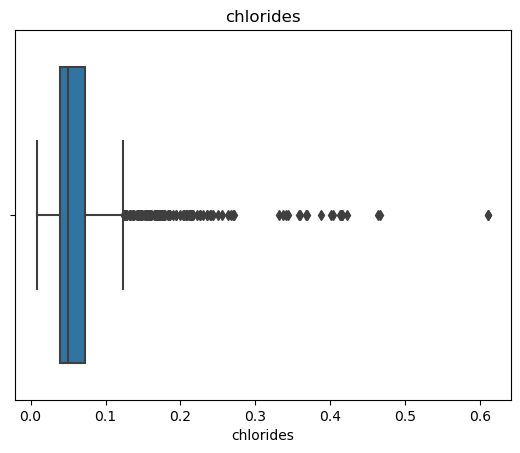

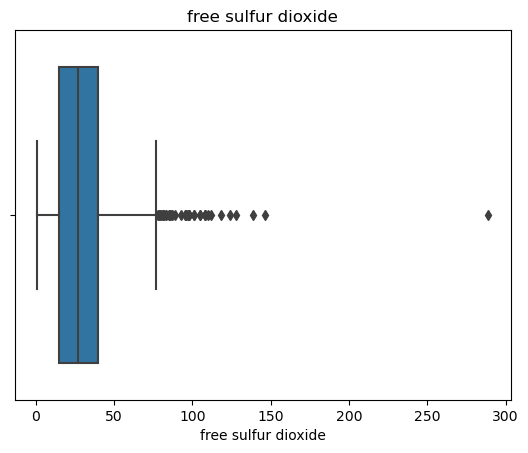

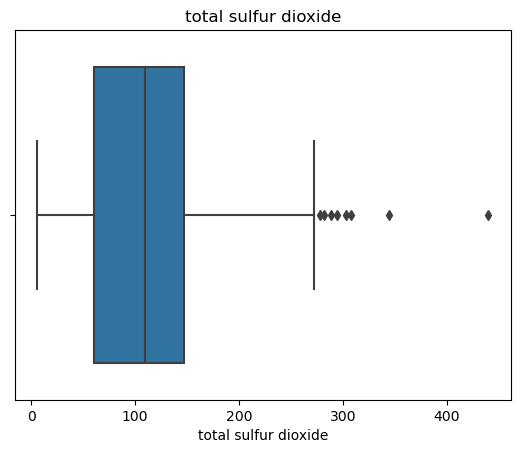

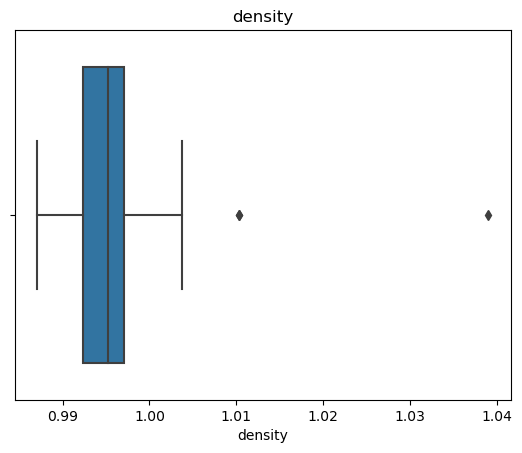

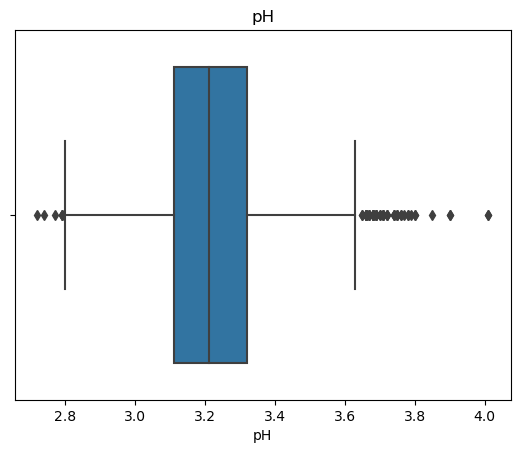

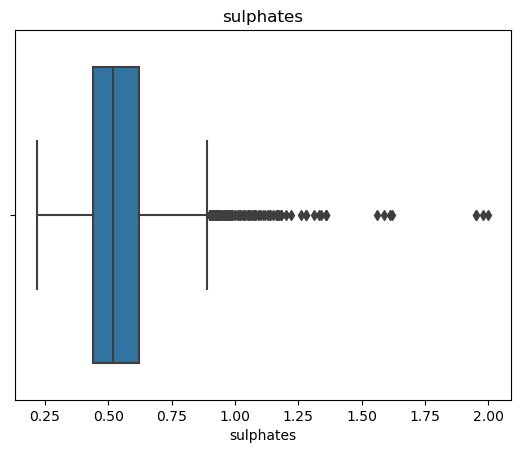

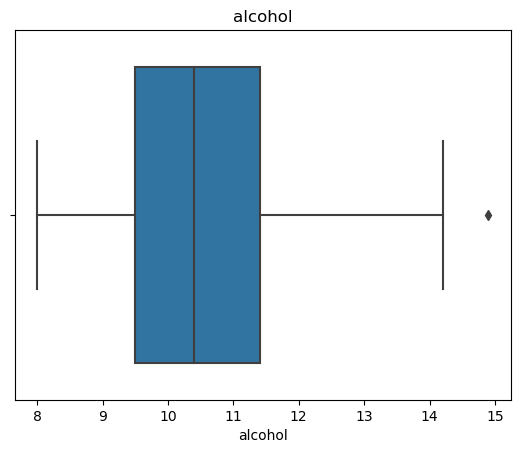

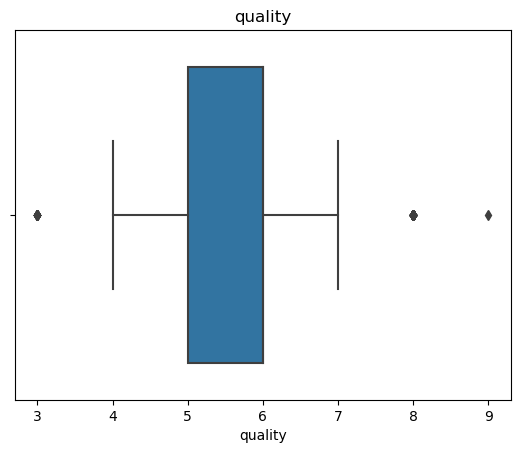

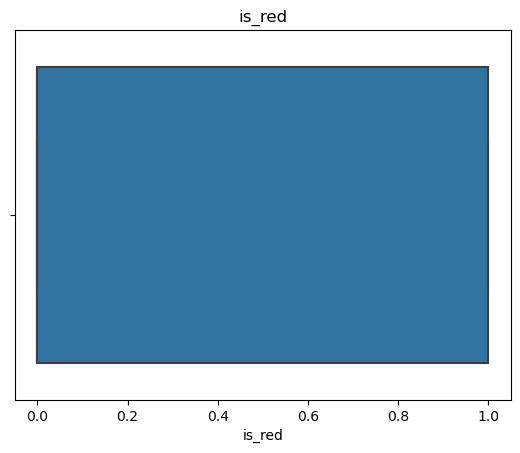

In [15]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()


In [16]:
def outlier_function(df, cols, k):
    '''
    This function takes in a dataframe, column, and k
    to detect and handle outlier using IQR rule
    '''
    for col in df[cols]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
        return df

In [17]:
df = outlier_function(df,k=1.5,cols=['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol',
                     'quality'])

In [110]:
len(df)

4587

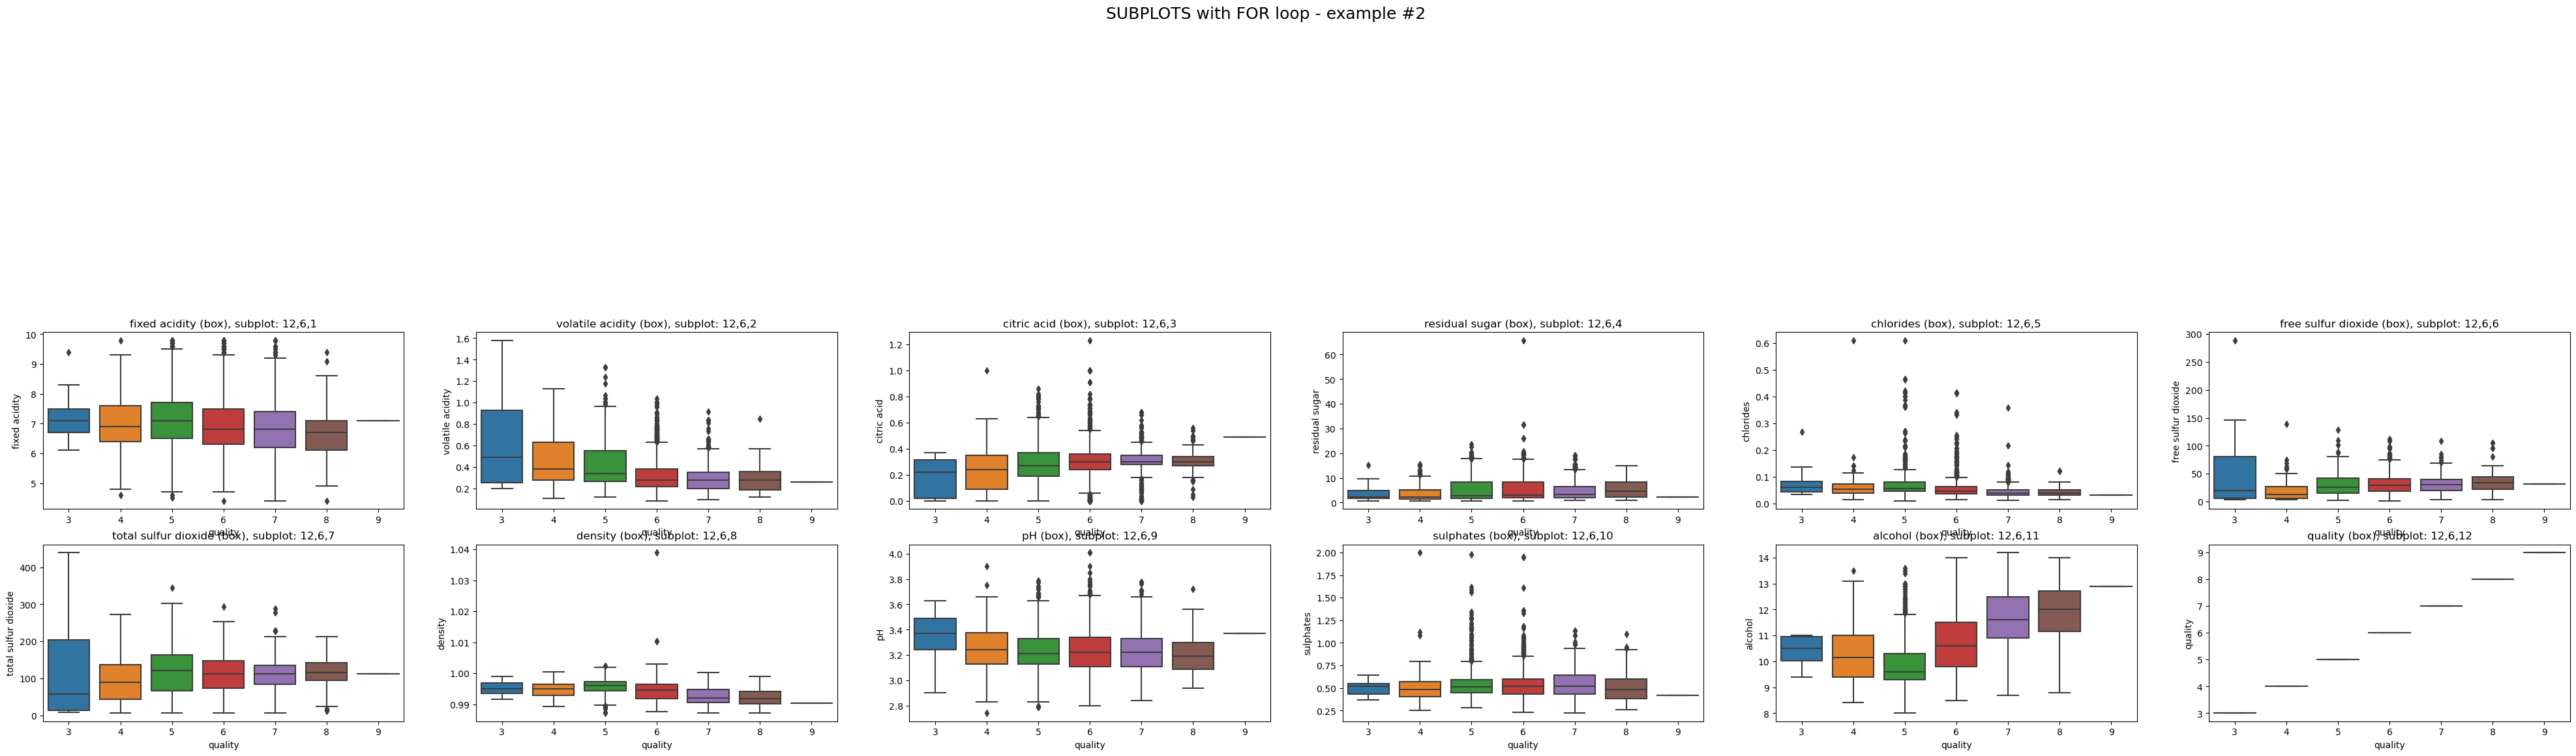

In [18]:
#  Numerical Data
heart_NUM = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol',
                     'quality']

#  plot Numerical Data
a = len(heart_NUM)  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (50,50))
plt.suptitle("SUBPLOTS with FOR loop - example #2", fontsize = 18)

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = df, y = i, x = 'quality')
    c = c + 1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4587 non-null   float64
 1   volatile acidity      4587 non-null   float64
 2   citric acid           4587 non-null   float64
 3   residual sugar        4587 non-null   float64
 4   chlorides             4587 non-null   float64
 5   free sulfur dioxide   4587 non-null   float64
 6   total sulfur dioxide  4587 non-null   float64
 7   density               4587 non-null   float64
 8   pH                    4587 non-null   float64
 9   sulphates             4587 non-null   float64
 10  alcohol               4587 non-null   float64
 11  quality               4587 non-null   int64  
 12  is_red                4587 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 501.7+ KB


In [20]:
#used get dummies to encode white and red categorical column. white_white is white wine. white_unkown is red wine
# and vice versa


In [21]:
df


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality is_red  
0         9.4        5      1  
1         9.8        5      1  
2         9.8        5      1  
4         9.4        5      1  
5         9.4        5      1  
...       ...      ...    ...  
4893     11.2        6      0  
4894      9.6        5      0  
4895      9.4        6      0  
4896     12.8        7      0  
4897     11.8        6      0  

[4587 rows x 13 columns]

In [22]:
def split(df, target_var):
    '''
    This function takes in the dataframe and target variable name as arguments and then
    splits the dataframe into train (56%), validate (24%), & test (20%)
    It will return a list containing the following dataframes: train (for exploration), 
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]
    return partitions


In [23]:
partitions = split(df, target_var='quality')

In [24]:
train = partitions[0]

In [25]:
X_train = partitions[1]

In [26]:
X_validate = partitions[2]

In [27]:
X_test = partitions[3]

In [28]:
y_train = partitions[4]

In [29]:
y_validate = partitions[5]

In [30]:
y_test = partitions[6]

In [31]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2678            7.1              0.31         0.17             1.0      0.042   
3138            6.9              0.22         0.43             6.4      0.042   
4400            7.4              0.27         0.26            11.8      0.053   
4891            5.7              0.21         0.32             0.9      0.038   
1087            7.9              0.19         0.42             1.6      0.057   
...             ...               ...          ...             ...        ...   
2628            7.0              0.24         0.24             9.0      0.030   
4456            6.0              0.28         0.29            19.3      0.051   
2114            7.7              0.23         0.31            10.7      0.038   
176             7.3              0.38         0.21             2.0      0.080   
0               7.4              0.70         0.00             1.9      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2678                 21.0                 144.0  0.99304  3.13       0.40   
3138                 34.0                 115.0  0.99293  3.05       0.51   
4400                 55.0                 173.0  0.99699  3.11       0.60   
4891                 38.0                 121.0  0.99074  3.24       0.46   
1087                 18.0                  30.0  0.99400  3.29       0.69   
...                   ...                   ...      ...   ...        ...   
2628                 42.0                 219.0  0.99636  3.47       0.46   
4456                 36.0                 174.0  0.99911  3.14       0.50   
2114                 59.0                 186.0  0.99690  3.12       0.55   
176                   7.0                  35.0  0.99610  3.33       0.47   
0                    11.0                  34.0  0.99780  3.51       0.56   

      alcohol is_red  
2678      9.6      0  
3138     10.8      0  
4400      9.8      0  
4891     10.6      0  
1087     11.2      1  
...       ...    ...  
2628     10.2      0  
4456      9.0      0  
2114      9.5      0  
176       9.5      1  
0         9.4      1  

[2568 rows x 12 columns]

# Exploration 

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'quality'
feature_target_corr = {}
for col in train:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(train[col], train[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'fixed acidity_quality': -0.12446409563413563, 'volatile acidity_quality': -0.2963674681144533, 'citric acid_quality': 0.10788959012249758, 'residual sugar_quality': 0.01275273566096754, 'chlorides_quality': -0.22358891728577396, 'free sulfur dioxide_quality': 0.1014464947579111, 'total sulfur dioxide_quality': -0.005275153464107004, 'density_quality': -0.3229276974868636, 'pH_quality': -0.05751408182550019, 'sulphates_quality': 0.02589784594946823, 'alcohol_quality': 0.4438690226745162, 'is_red_quality': -0.15975901353582495}


In [33]:
data = {'Features':['fixed acidity_quality', 'volatile acidity_quality', 
                     'citric acid_quality', 'residual sugar_quality', 'chlorides_quality', 
                     'free sulfur dioxide_quality', 'total sulfur dioxide_quality', 
                     'density_quality', 'pH_quality', 'sulphates_quality', 'alcohol_quality', 
                     'is_red_0_quality',
                     'is_red_1_quality'],
        
        'Feature-Target Correlations':[-0.11651838955269114, 
-0.27287021112435683, 
0.07511491417080955, 
-0.0373917814079513, 
-0.20084284035965716, 
0.07658153734723858, 
-0.028942855686063147, 
-0.32248802572391144, 
0.007541134436750967, 
0.016851732466794476, 
0.4227385893563322, 
0.1406782728239583, 
-0.1406782728239583]}


data = pd.DataFrame.from_dict(data)

In [34]:
data

Features  Feature-Target Correlations
0          fixed acidity_quality                    -0.116518
1       volatile acidity_quality                    -0.272870
2            citric acid_quality                     0.075115
3         residual sugar_quality                    -0.037392
4              chlorides_quality                    -0.200843
5    free sulfur dioxide_quality                     0.076582
6   total sulfur dioxide_quality                    -0.028943
7                density_quality                    -0.322488
8                     pH_quality                     0.007541
9              sulphates_quality                     0.016852
10               alcohol_quality                     0.422739
11              is_red_0_quality                     0.140678
12              is_red_1_quality                    -0.140678

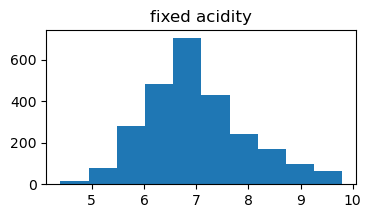

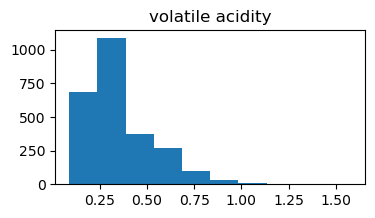

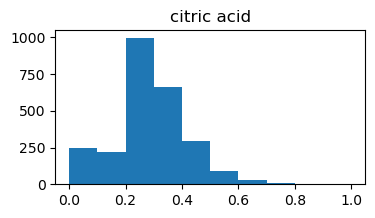

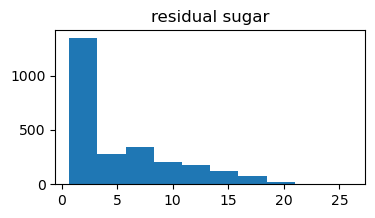

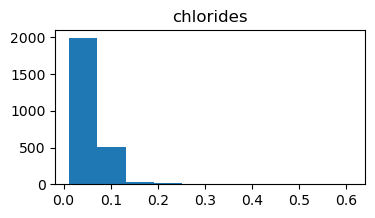

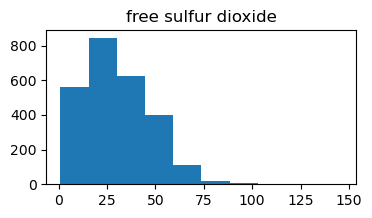

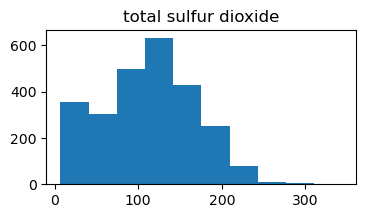

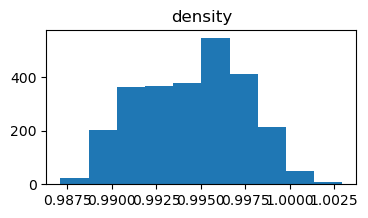

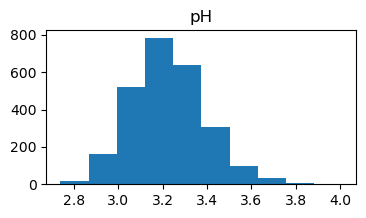

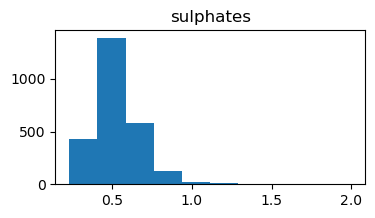

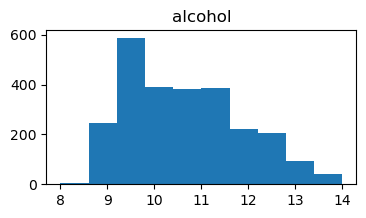

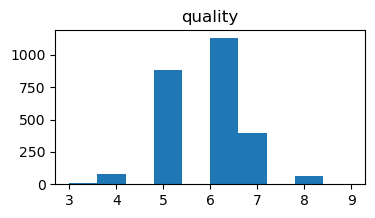

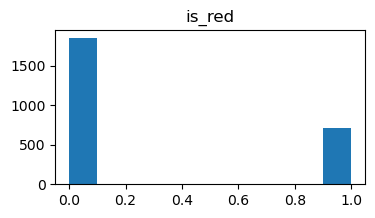

In [35]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()


In [36]:
# bin quality into 3 bins


* We have 2 groups and want to compare a continuous variable => independent (2-sample) t-test.
* Our 2 groups: is_male==0 and is_male==1
* Our continuous variable: spending_score.
* Null hypothesis: H0:μis_red_1==1 = μis_red_0==0

* Test the assumption of equal variance of spending score for the 2 groups using Levene's Test. As in other tests, the null hypothesis is the one that assumes equality, i.e. the variance of spending score for the non-male group == variance of spending score for the male group. If p-value > .05, we can say that the variances are not significantly different and set the argument in ttest_ind of equal_var to be True. If p-value < .05, we say the variances are NOT equal and set equal_var to be False.

# test the equal variance 
# H0 is that the variances are equal
# Levene test
# our two groups are 1) where train.is_red_0==0 and 
# 2) where train.is_red_1 == 1

stats.levene(train[train.is_red ==0].quality, equal_var=True
               )


stats.ttest_ind(train[train.is_red_0==0].quality, 
                train[train.is_red_1==1].quality, 
                equal_var=True
               )


No difference in mean quality between red and white wines. 

Is there a relationship
between annual income and spending score?


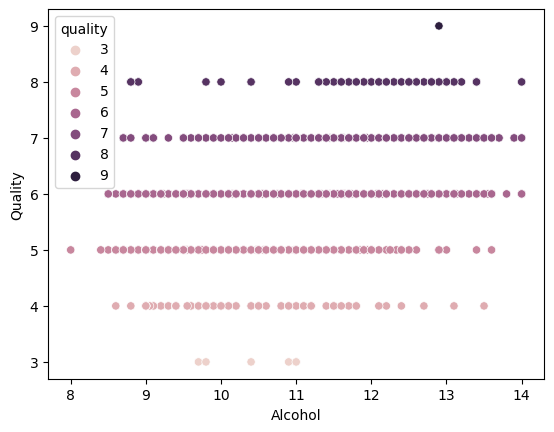

In [37]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.scatterplot(x="alcohol", y="quality", data=train, hue='quality')
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()


In [38]:
train.corr(method='spearman')

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.234535     0.138254   
volatile acidity           0.234535          1.000000    -0.390557   
citric acid                0.138254         -0.390557     1.000000   
residual sugar            -0.010944         -0.120289     0.090708   
chlorides                  0.379469          0.462217    -0.166622   
free sulfur dioxide       -0.205495         -0.401562     0.210211   
total sulfur dioxide      -0.186221         -0.396764     0.267255   
density                    0.435039          0.254792    -0.050593   
pH                        -0.161627          0.299167    -0.273145   
sulphates                  0.215606          0.255857    -0.013284   
alcohol                   -0.172821         -0.031224     0.049023   
quality                   -0.129651         -0.286518     0.133203   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.010944   0.379469            -0.205495   
volatile acidity           -0.120289   0.462217            -0.401562   
citric acid                 0.090708  -0.166622             0.210211   
residual sugar              1.000000  -0.053604             0.372518   
chlorides                  -0.053604   1.000000            -0.285237   
free sulfur dioxide         0.372518  -0.285237             1.000000   
total sulfur dioxide        0.478954  -0.297312             0.736564   
density                     0.510566   0.593521             0.009196   
pH                         -0.275082   0.257036            -0.248318   
sulphates                  -0.183977   0.377131            -0.217129   
alcohol                    -0.321182  -0.425999            -0.153983   
quality                     0.035480  -0.320805             0.120236   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.186221  0.435039 -0.161627   0.215606   
volatile acidity                 -0.396764  0.254792  0.299167   0.255857   
citric acid                       0.267255 -0.050593 -0.273145  -0.013284   
residual sugar                    0.478954  0.510566 -0.275082  -0.183977   
chlorides                        -0.297312  0.593521  0.257036   0.377131   
free sulfur dioxide               0.736564  0.009196 -0.248318  -0.217129   
total sulfur dioxide              1.000000  0.083617 -0.336365  -0.269804   
density                           0.083617  1.000000  0.092774   0.245951   
pH                               -0.336365  0.092774  1.000000   0.307329   
sulphates                        -0.269804  0.245951  0.307329   1.000000   
alcohol                          -0.280782 -0.748268  0.115592  -0.020684   
quality                          -0.023122 -0.334141 -0.043773   0.020071   

                       alcohol   quality  
fixed acidity        -0.172821 -0.129651  
volatile acidity     -0.031224 -0.286518  
citric acid           0.049023  0.133203  
residual sugar       -0.321182  0.035480  
chlorides            -0.425999 -0.320805  
free sulfur dioxide  -0.153983  0.120236  
total sulfur dioxide -0.280782 -0.023122  
density              -0.748268 -0.334141  
pH                    0.115592 -0.043773  
sulphates            -0.020684  0.020071  
alcohol               1.000000  0.451395  
quality               0.451395  1.000000

Is there a relationship
between annual income and spending score?


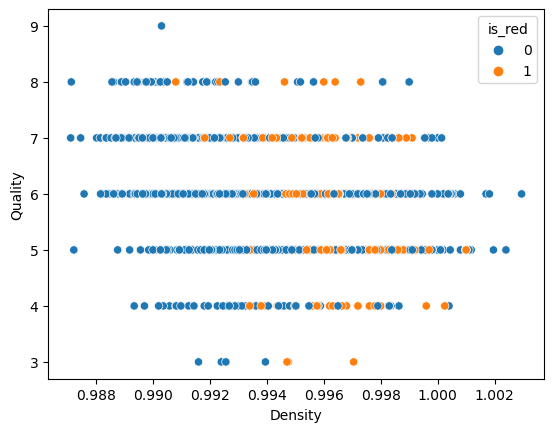

In [39]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.scatterplot(x="density", y="quality", data=train, hue='is_red')
plt.xlabel("Density")
plt.ylabel("Quality")
plt.show()


<AxesSubplot:>

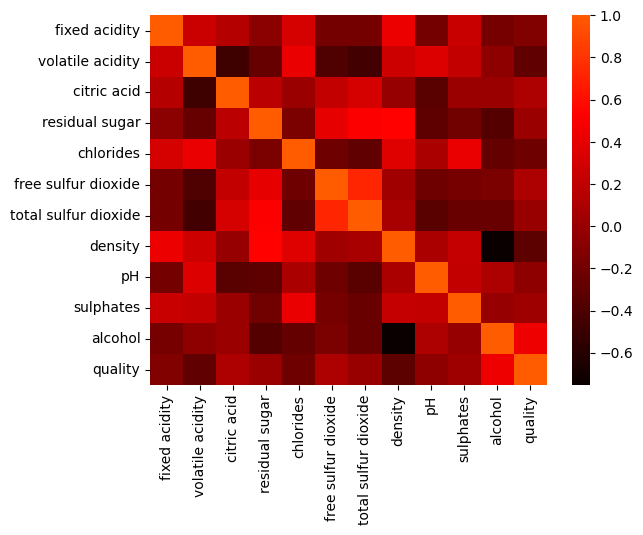

In [40]:
# visualize correlation
sns.heatmap(train.corr(),center = True,cmap='hot')

Is there a relationship
between chlorides and quality?


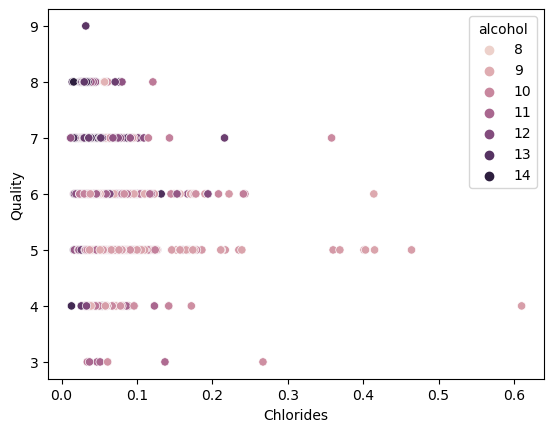

In [111]:
print("Is there a relationship\nbetween chlorides and quality?")
sns.scatterplot(x="chlorides", y="quality", data=train, hue='alcohol')
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.show()

Is there a relationship
between volatile acidity and quality?


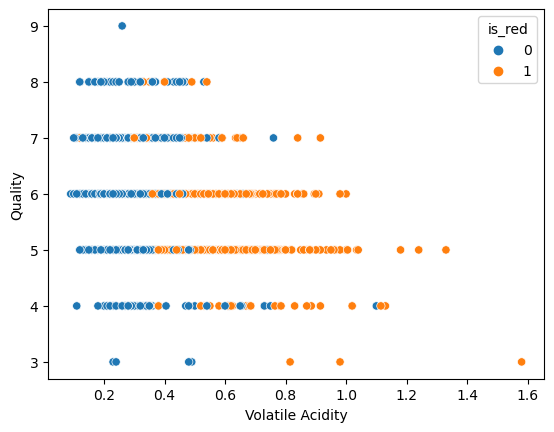

In [42]:
print("Is there a relationship\nbetween volatile acidity and quality?")
sns.scatterplot(x="volatile acidity", y="quality", data=train, hue='is_red')
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.show()

Interaction of variables along with younger vs older
(cutoff=40)


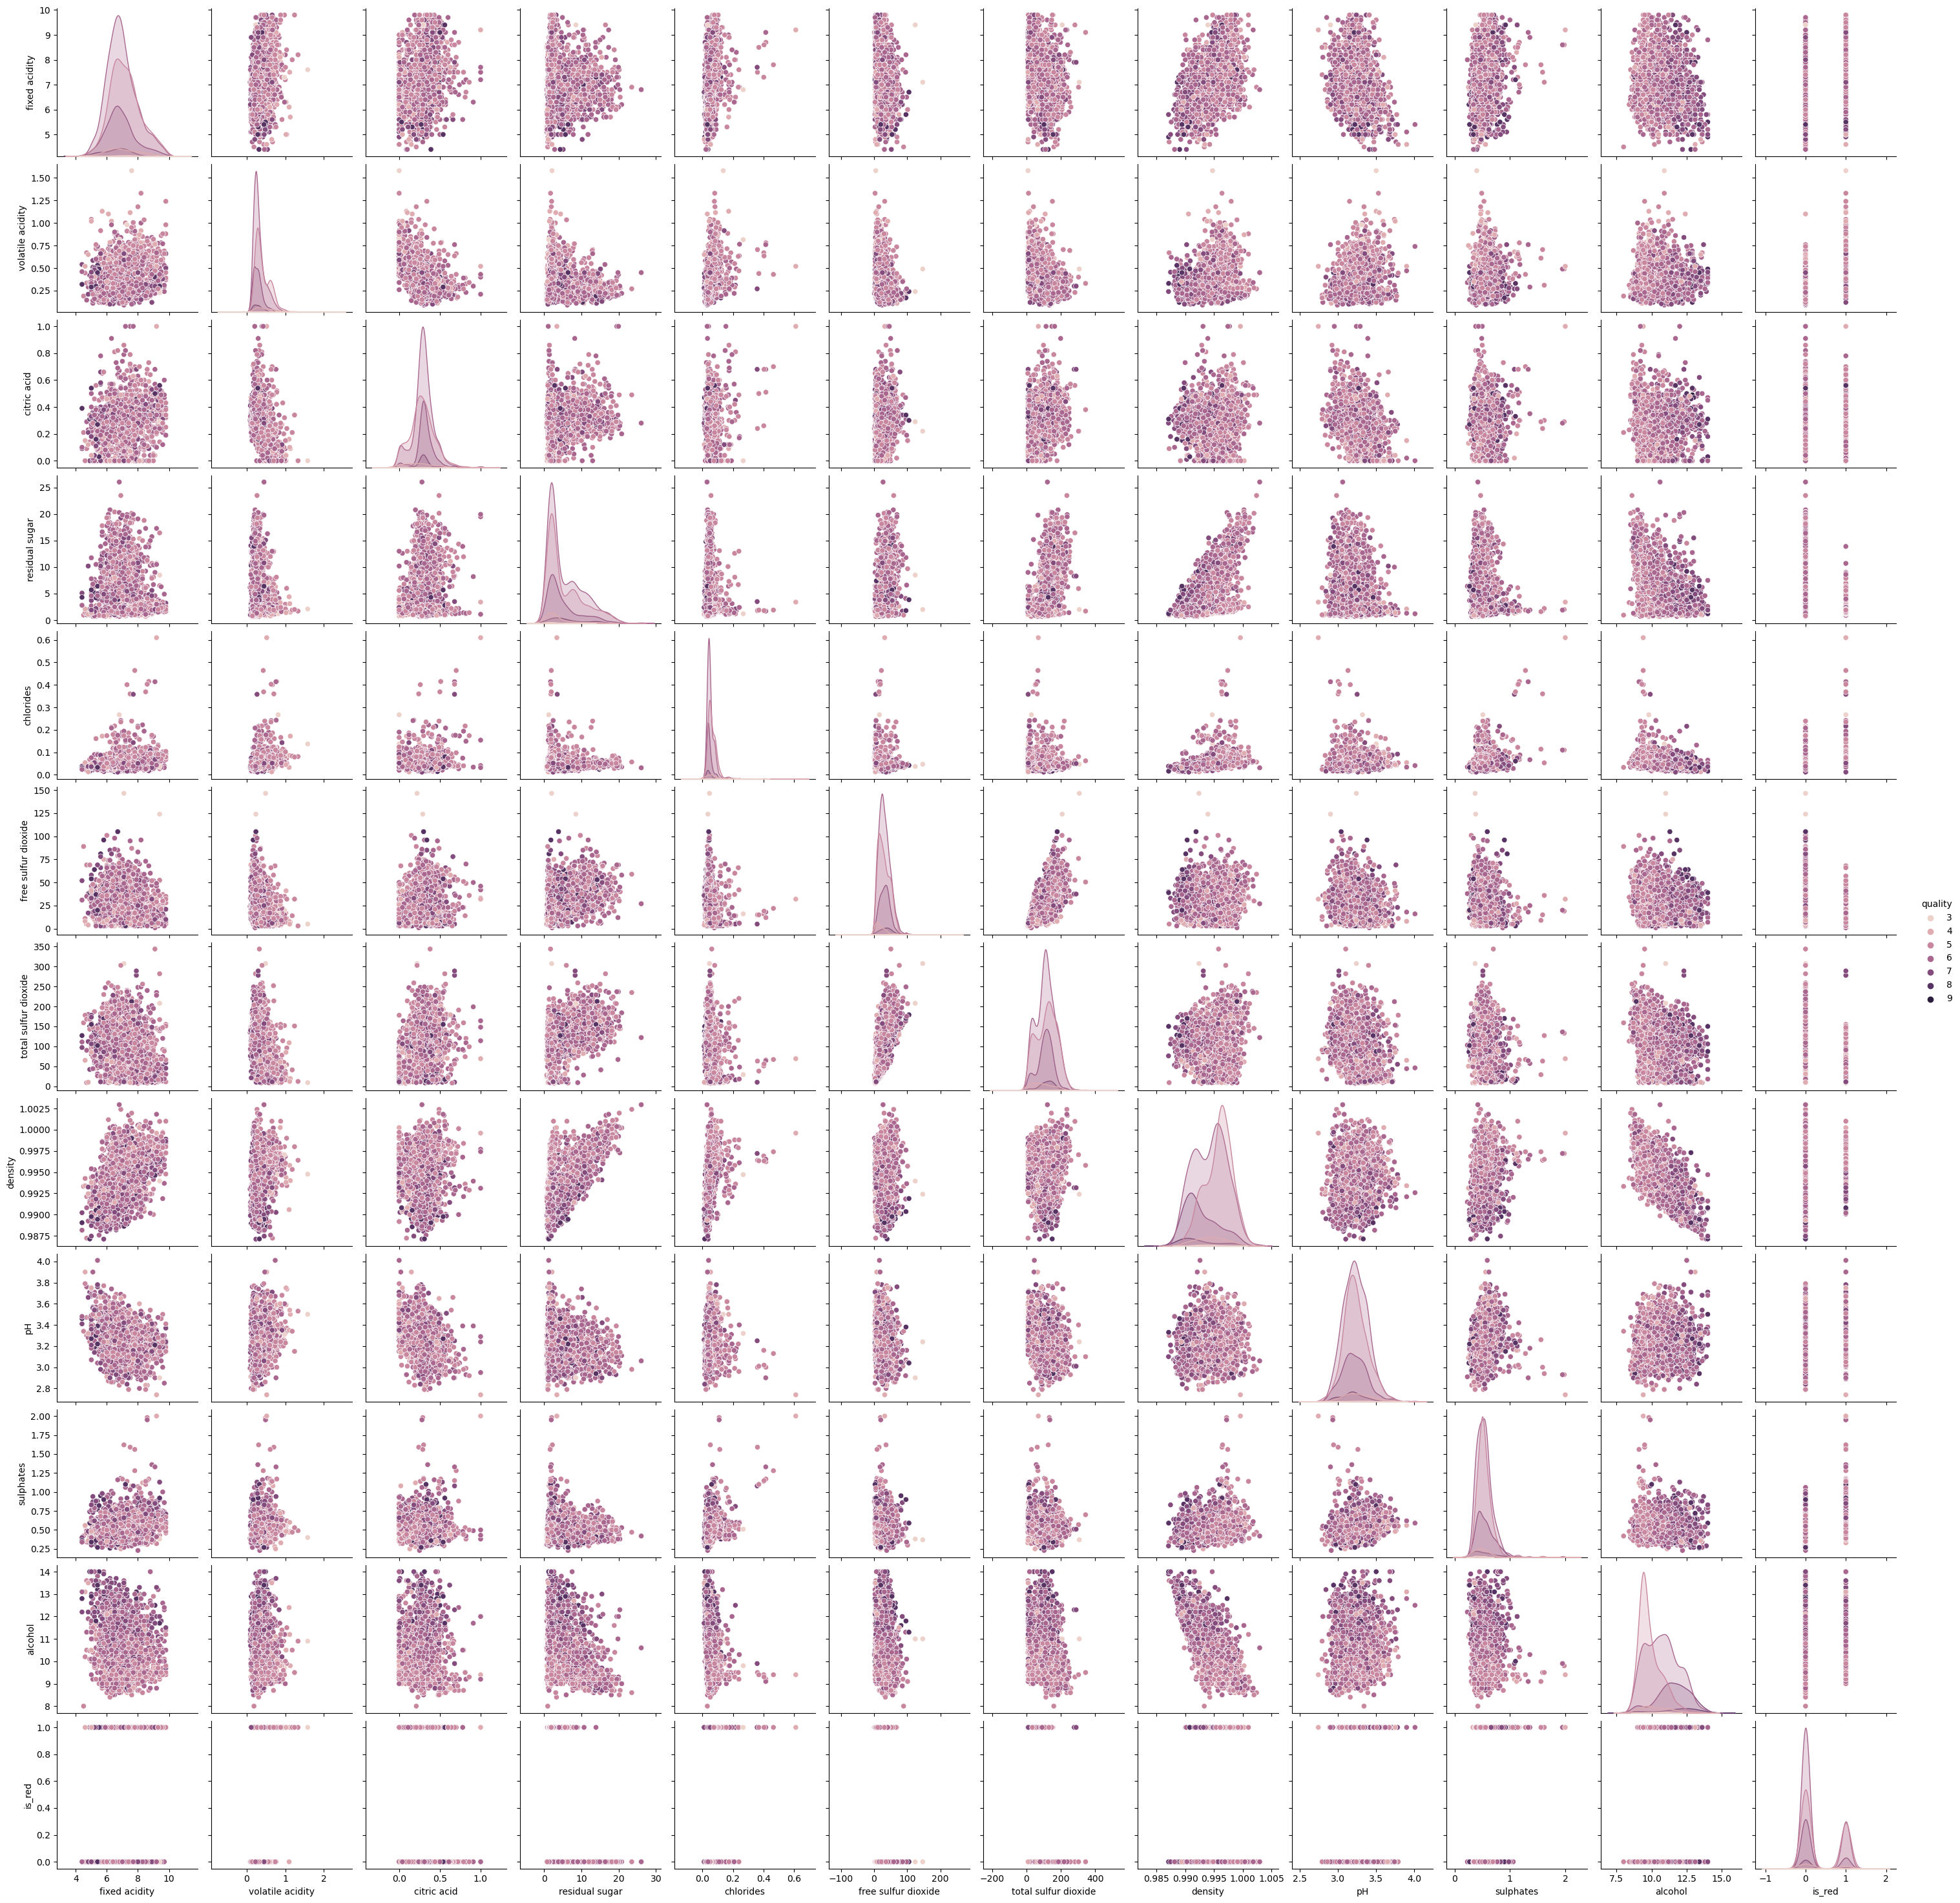

In [43]:
print("Interaction of variables along with younger vs older\n(cutoff=40)")
sns.pairplot(train, hue='quality')
plt.show()

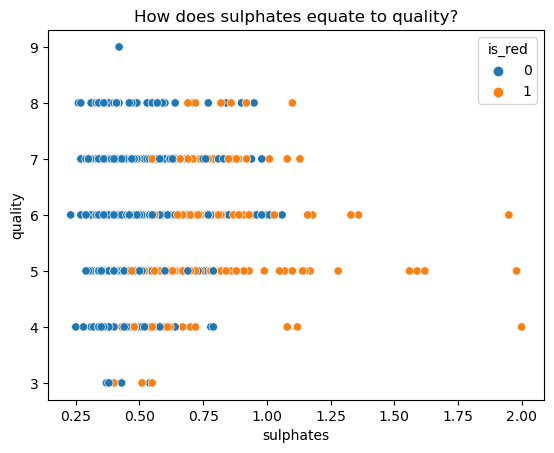

In [44]:
sns.scatterplot(x='sulphates', y='quality',
               data=train, hue='is_red')
plt.title("How does sulphates equate to quality?")
plt.show()

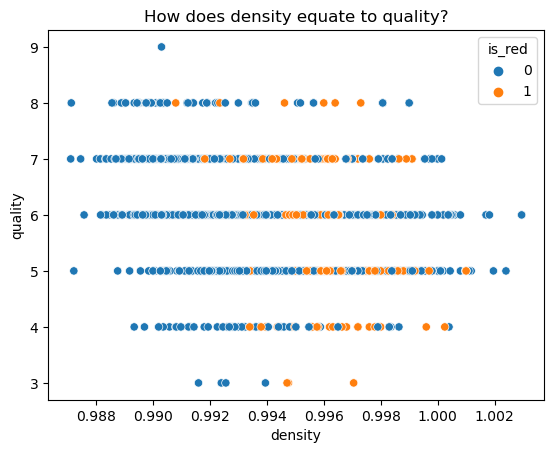

In [45]:
sns.scatterplot(x='density', y='quality',
               data=train, hue='is_red')
plt.title("How does density equate to quality?")
plt.show()

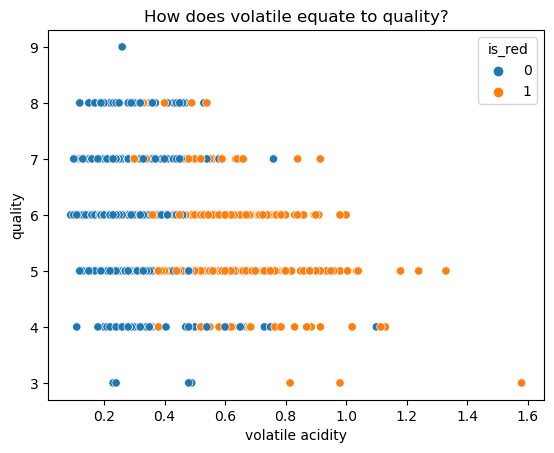

In [46]:
sns.scatterplot(x='volatile acidity', y='quality',
               data=train, hue='is_red')
plt.title("How does volatile equate to quality?")
plt.show()

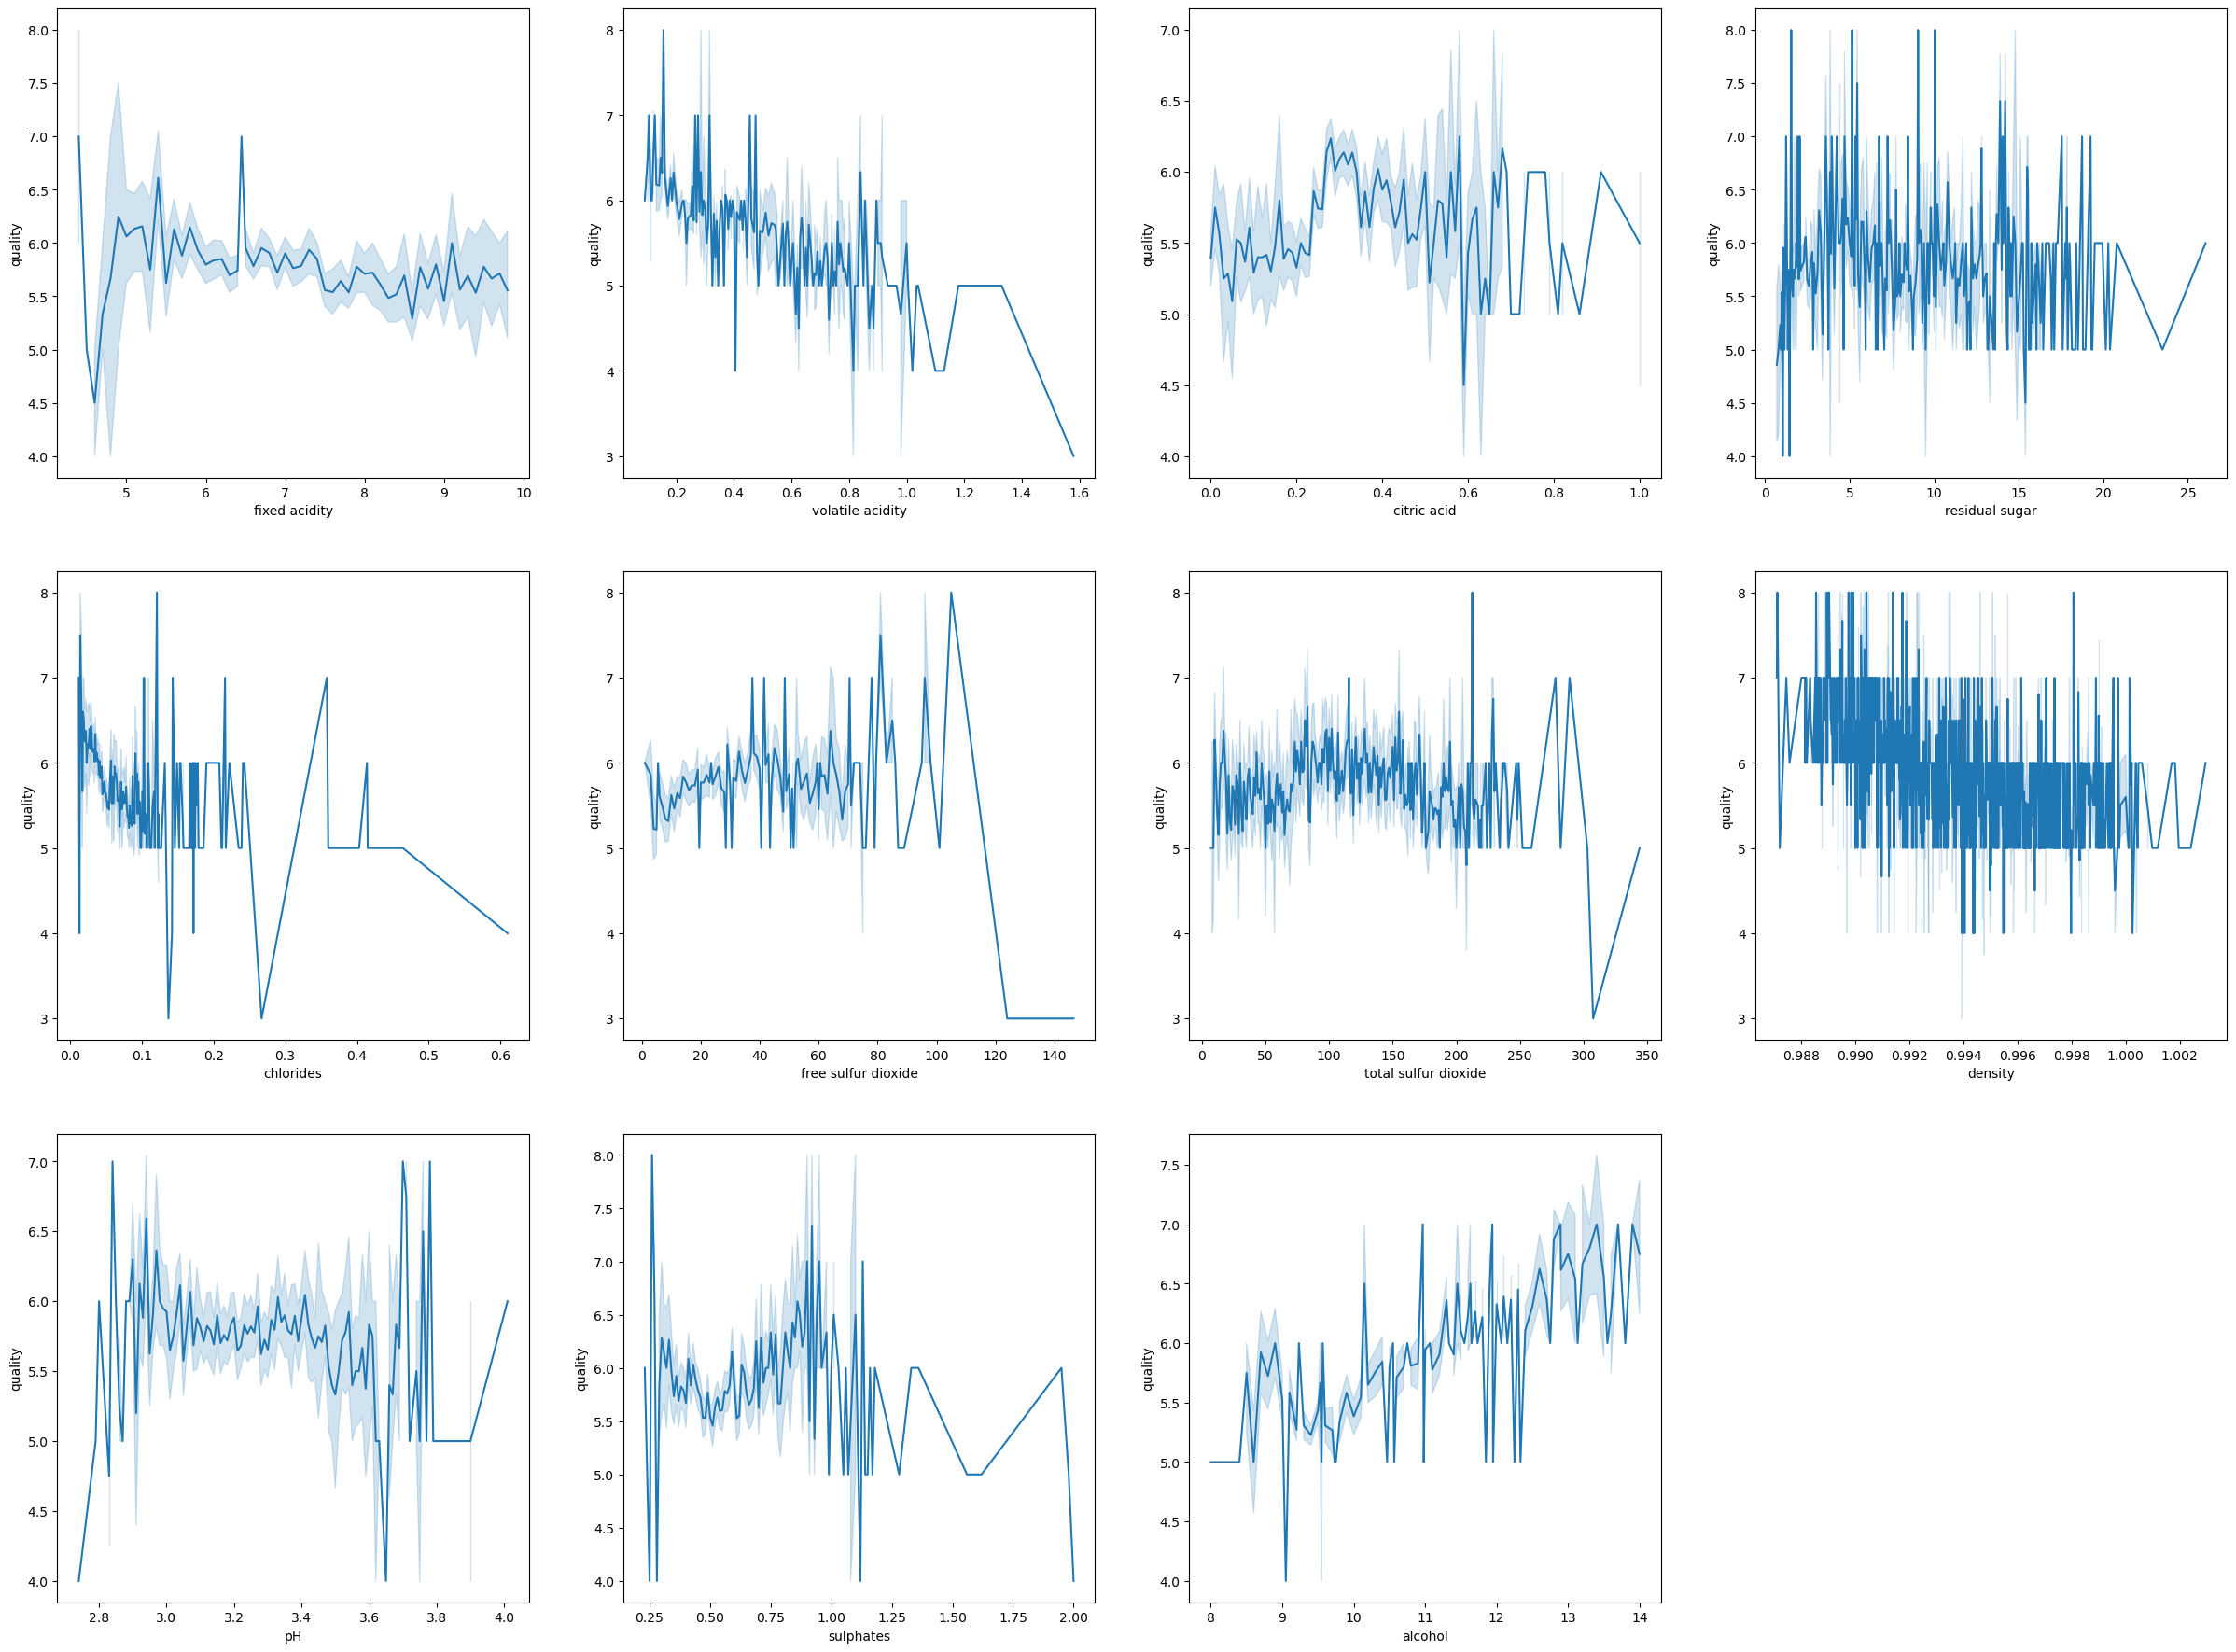

In [47]:
# relation between each feature and the output
feature_name = train.columns[:12]
fig = plt.figure(figsize=(30,30))
for i in range(1,12):
    axs = fig.add_subplot(4,4,i)
    sns.lineplot(x = train[feature_name[i-1]],y = train['quality'])

In [48]:
train.quality.value_counts()

6    1134
5     881
7     398
4      80
8      67
3       7
9       1
Name: quality, dtype: int64

sns.scatterplot(x='volatile acidity', y='alcohol',
               data=train, hue='wine_quality')
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

print("Interaction of variables along with younger vs older\n(cutoff=40)")
sns.pairplot(train, hue='wine_quality')
plt.show()

print("Interaction of variables along with gender")
sns.pairplot(train, hue='wine_quality')
plt.show()


# Modeling

In [49]:
X = train[['alcohol','volatile acidity']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 3, 1, ..., 2, 2, 2], dtype=int32)

In [50]:
train['cluster'] = kmeans.predict(X)

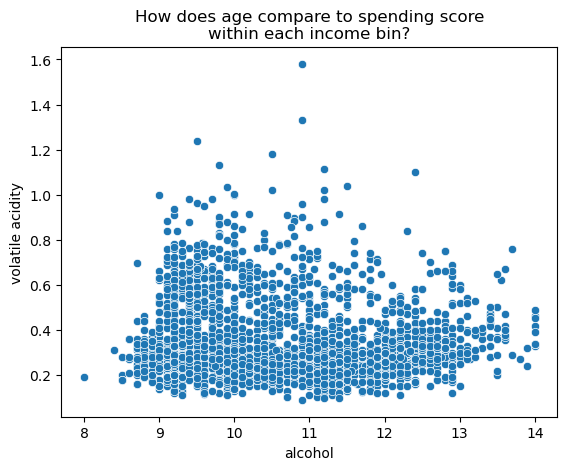

In [51]:
sns.scatterplot(x='alcohol', y='volatile acidity', data=train)
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

sns.scatterplot(x='alcohol', y='volatile acidity', data=train, hue='wine_quality')
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

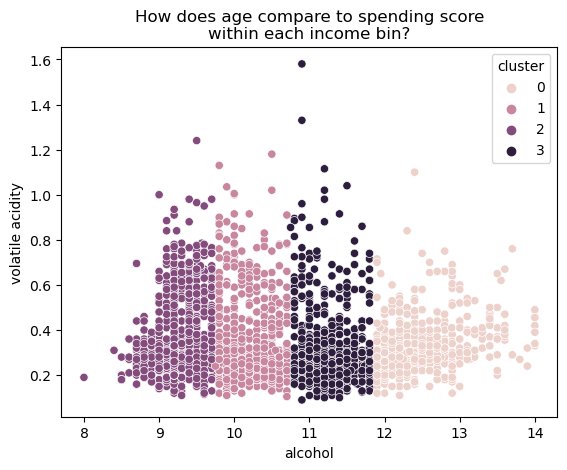

In [52]:
sns.scatterplot(x='alcohol', y='volatile acidity', data=train, hue='cluster')
plt.title("How does age compare to spending score\nwithin each income bin?")
plt.show()

In [53]:
kmeans.cluster_centers_


array([[12.54326711,  0.34005519],
       [10.22226522,  0.35996904],
       [ 9.27644497,  0.37139549],
       [11.23399256,  0.32641148]])

In [54]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

alcohol  volatile acidity
0  12.543267          0.340055
1  10.222265          0.359969
2   9.276445          0.371395
3  11.233993          0.326411

In [55]:
train.groupby('cluster')['alcohol', 'volatile acidity'].mean()


alcohol  volatile acidity
cluster                             
0        12.543267          0.340055
1        10.222265          0.359969
2         9.276445          0.371395
3        11.233993          0.326411

Text(0.5, 1.0, 'Visualizing Cluster Centers')

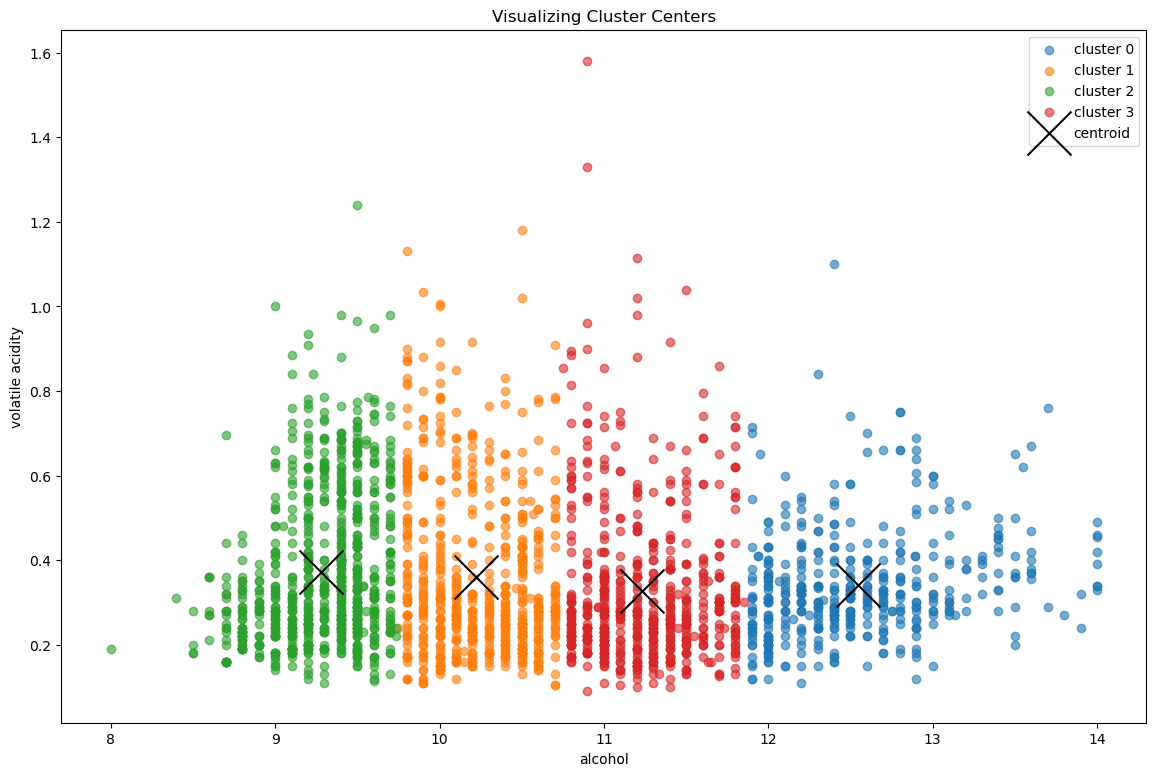

In [56]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.alcohol, subset['volatile acidity'], label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='volatile acidity', x='alcohol', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Visualizing Cluster Centers')


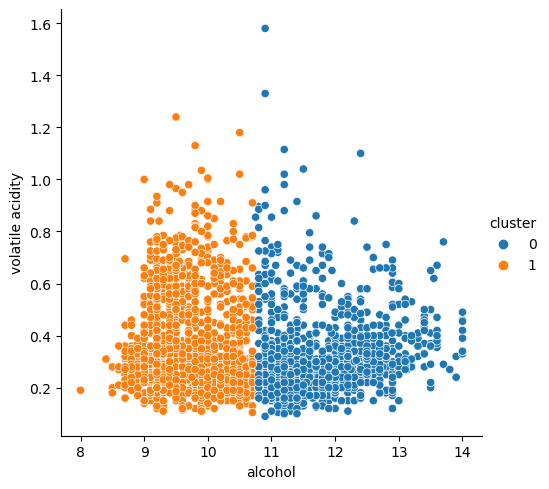

In [57]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='alcohol', y='volatile acidity', hue='cluster')


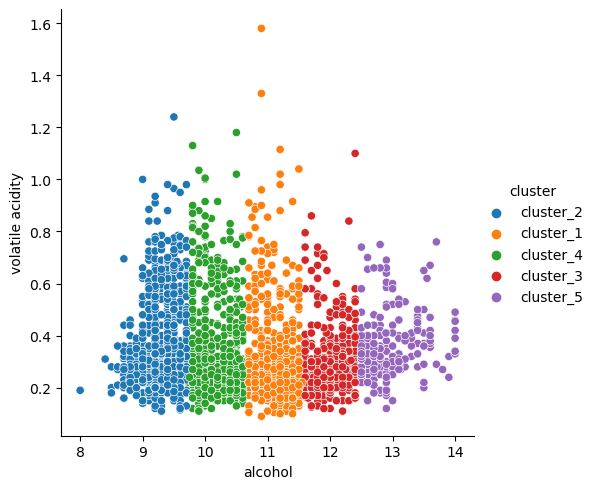

In [58]:
kmeans = KMeans(n_clusters=5).fit(X)
train['cluster'] = kmeans.predict(X)
train.cluster = 'cluster_' + (train.cluster + 1).astype('str')
sns.relplot(data=train, x='alcohol', y='volatile acidity', hue='cluster')


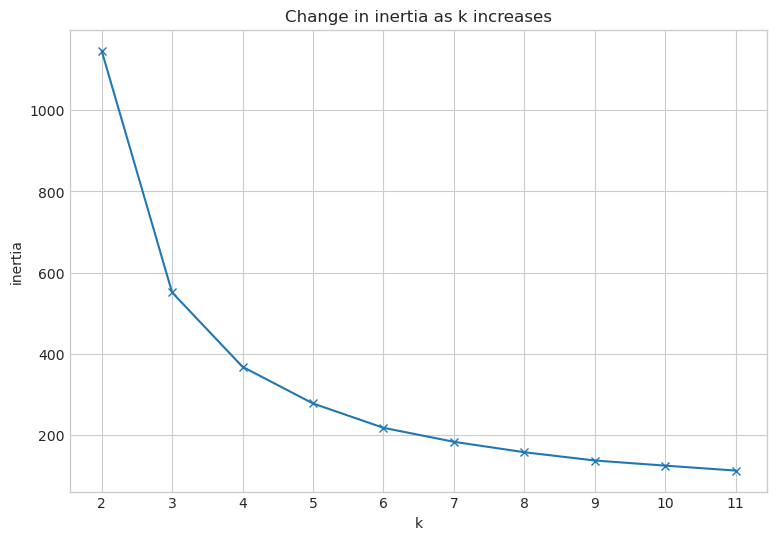

In [59]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [60]:
X

alcohol  volatile acidity
2678      9.6              0.31
3138     10.8              0.22
4400      9.8              0.27
4891     10.6              0.21
1087     11.2              0.19
...       ...               ...
2628     10.2              0.24
4456      9.0              0.28
2114      9.5              0.23
176       9.5              0.38
0         9.4              0.70

[2568 rows x 2 columns]

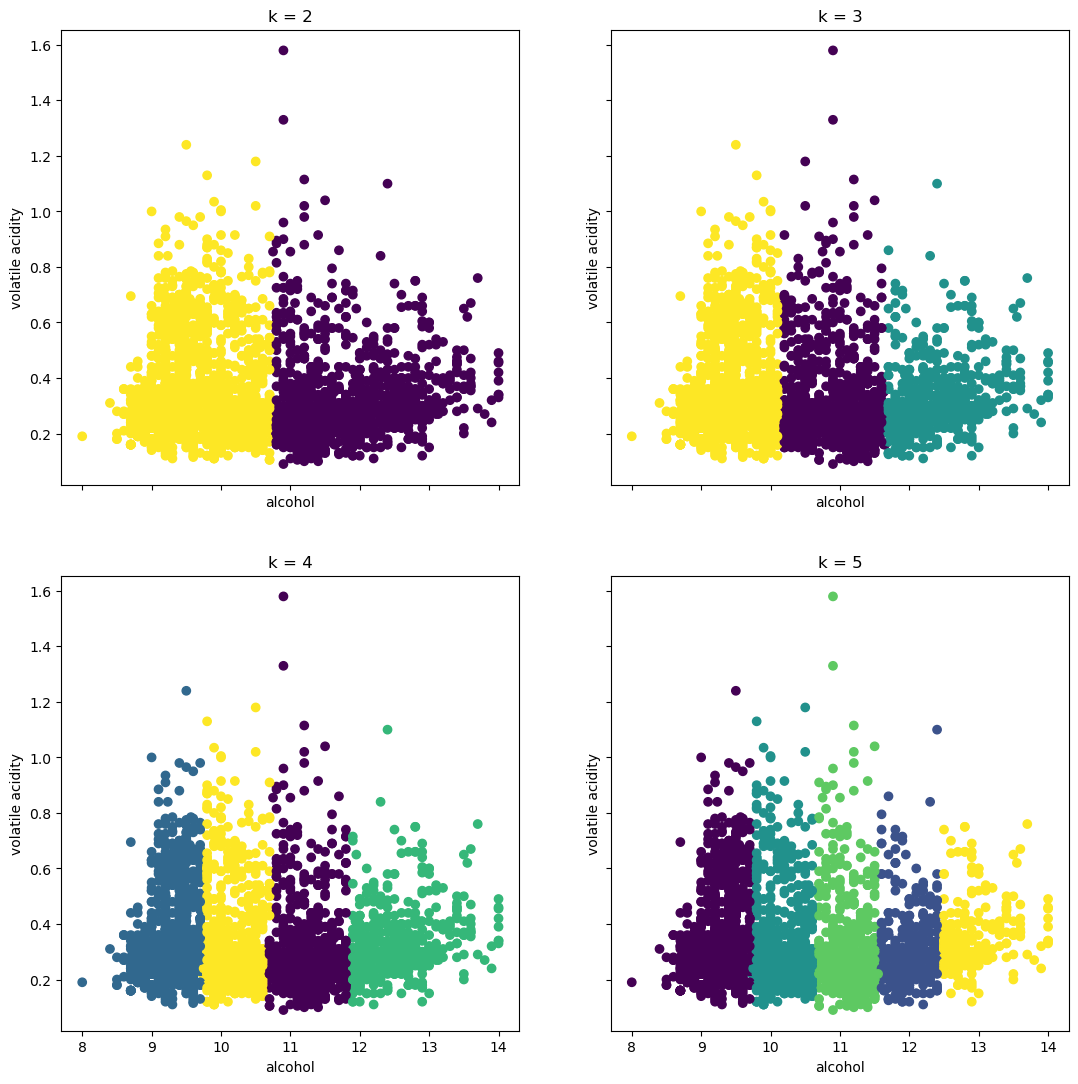

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.alcohol, X['volatile acidity'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='alcohol', ylabel='volatile acidity')


In [62]:
# the variables that still need scaling
scaled_vars = ['alcohol', 'volatile acidity', 'sulphates', 'density','chlorides','free sulfur dioxide']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])


In [63]:
# recall: X[0] is X_train, X[1] is X_validate and X[2] is X_test
X[0].describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2568.000000       2568.000000  2568.000000     2568.000000   
mean        7.005393          0.352009     0.290530        5.415888   
std         0.968802          0.175878     0.136041        4.710258   
min         4.400000          0.090000     0.000000        0.700000   
25%         6.400000          0.230000     0.230000        1.800000   
50%         6.900000          0.300000     0.290000        2.800000   
75%         7.600000          0.430000     0.360000        8.100000   
max         9.800000          1.580000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2568.000000          2568.000000           2568.000000  2568.000000   
mean      0.056502            30.355530            111.945872     0.994514   
std       0.035054            17.277929             55.441143     0.002932   
min       0.012000             1.000000              7.000000     0.987110   
25%       0.038000            17.000000             73.000000     0.992080   
50%       0.048000            28.000000            113.500000     0.994880   
75%       0.067000            41.000000            149.000000     0.996770   
max       0.610000           146.500000            344.000000     1.002950   

                pH    sulphates      alcohol  scaled_alcohol  \
count  2568.000000  2568.000000  2568.000000     2568.000000   
mean      3.226834     0.536850    10.568599        0.428100   
std       0.163680     0.154421     1.219508        0.203251   
min       2.740000     0.230000     8.000000        0.000000   
25%       3.110000     0.440000     9.500000        0.250000   
50%       3.220000     0.520000    10.400000        0.400000   
75%       3.330000     0.600000    11.400000        0.566667   
max       4.010000     2.000000    14.000000        1.000000   

       scaled_volatile acidity  scaled_sulphates  scaled_density  \
count              2568.000000       2568.000000     2568.000000   
mean                  0.175845          0.173361        0.467413   
std                   0.118039          0.087243        0.185087   
min                   0.000000          0.000000        0.000000   
25%                   0.093960          0.118644        0.313763   
50%                   0.140940          0.163842        0.490530   
75%                   0.228188          0.209040        0.609848   
max                   1.000000          1.000000        1.000000   

       scaled_chlorides  scaled_free sulfur dioxide  
count       2568.000000                 2568.000000  
mean           0.074418                    0.201756  
std            0.058619                    0.118749  
min            0.000000                    0.000000  
25%            0.043478                    0.109966  
50%            0.060201                    0.185567  
75%            0.091973                    0.274914  
max            1.000000                    1.000000

In [64]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_chlorides', 'scaled_alcohol', 'scaled_volatile acidity']
cluster_name = 'quality_cluster'
k_range = range(2,20)


In [65]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df


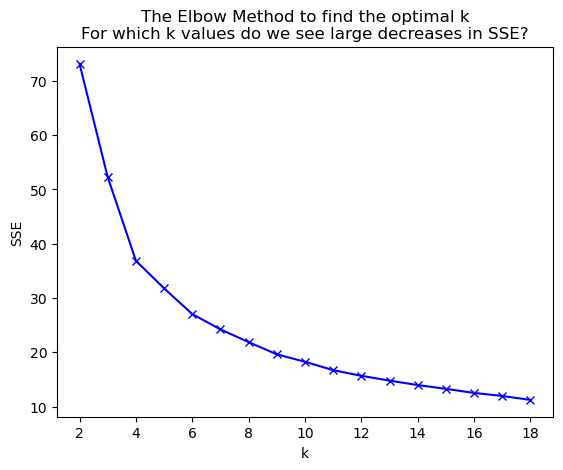

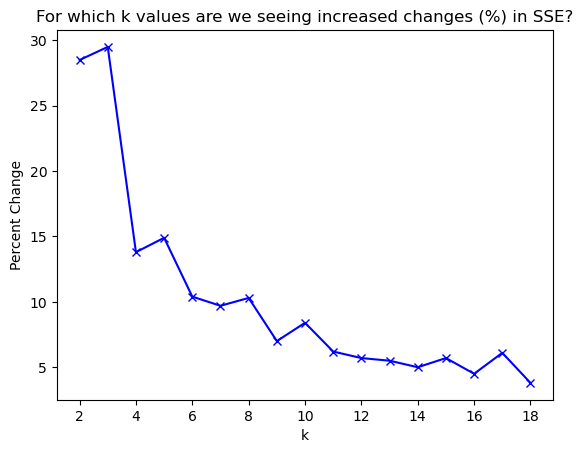

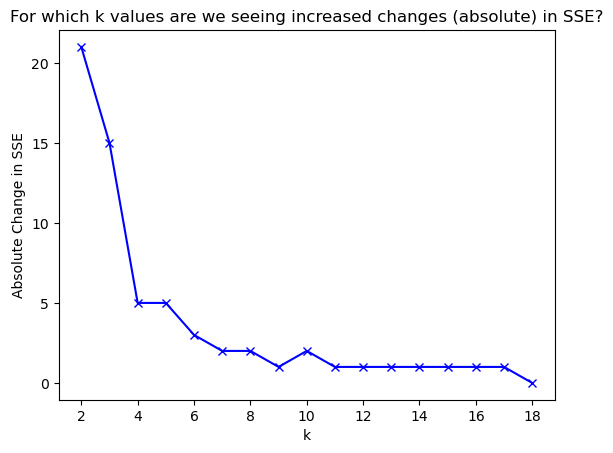

k        sse  delta  pct_delta
0    2  73.109729   21.0       28.5
1    3  52.240870   15.0       29.5
2    4  36.849653    5.0       13.8
3    5  31.770274    5.0       14.9
4    6  27.033437    3.0       10.4
5    7  24.210702    2.0        9.7
6    8  21.868099    2.0       10.3
7    9  19.618088    1.0        7.0
8   10  18.244134    2.0        8.4
9   11  16.703232    1.0        6.2
10  12  15.664853    1.0        5.7
11  13  14.776865    1.0        5.5
12  14  13.962159    1.0        5.0
13  15  13.263495    1.0        5.7
14  16  12.513038    1.0        4.5
15  17  11.951896    1.0        6.1
16  18  11.225246    0.0        3.8

In [66]:
find_k(X[0], cluster_vars, k_range)


In [67]:
k = 4
# as reminders: 
cluster_vars = ['scaled_chlorides', 'scaled_alcohol', 'scaled_volatile acidity']
cluster_name = 'quality_cluster'


In [68]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans


In [69]:
kmeans = create_clusters(X[0], k, cluster_vars)


In [70]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [71]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


In [72]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X


In [73]:
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)


In [74]:
pd.DataFrame(X[0].groupby(['quality_cluster', 'centroid_scaled_chlorides', 'centroid_scaled_alcohol', 
                           'centroid_scaled_volatile acidity'])['quality_cluster'].count())


quality_cluster
quality_cluster centroid_scaled_chlorides centroid_scaled_alcohol centroid_scaled_volatile acidity                 
0               0.057463                  0.484657                0.117845                                      780
1               0.073158                  0.232969                0.126485                                      816
2               0.135630                  0.316868                0.373381                                      441
3               0.050422                  0.737262                0.172841                                      531

In [75]:
X

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 2678            7.1              0.31         0.17             1.0      0.042   
 3138            6.9              0.22         0.43             6.4      0.042   
 4400            7.4              0.27         0.26            11.8      0.053   
 4891            5.7              0.21         0.32             0.9      0.038   
 1087            7.9              0.19         0.42             1.6      0.057   
 ...             ...               ...          ...             ...        ...   
 2628            7.0              0.24         0.24             9.0      0.030   
 4456            6.0              0.28         0.29            19.3      0.051   
 2114            7.7              0.23         0.31            10.7      0.038   
 176             7.3              0.38         0.21             2.0      0.080   
 0               7.4              0.70         0.00             1.9      0.076   
 
       free su

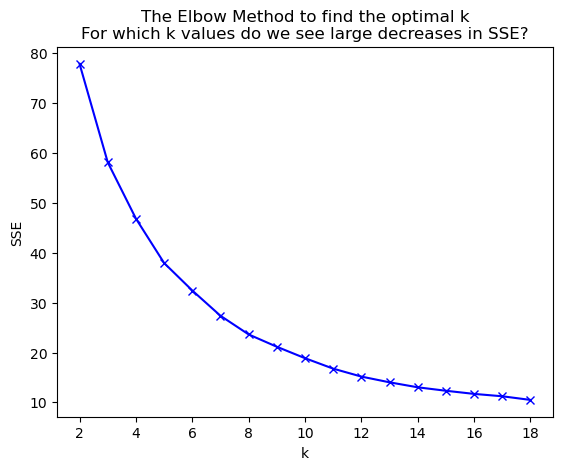

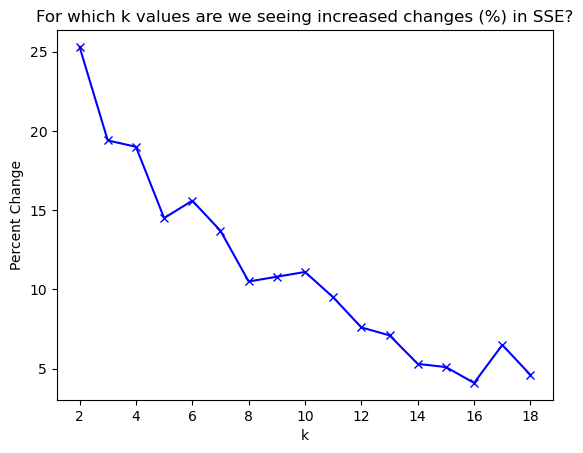

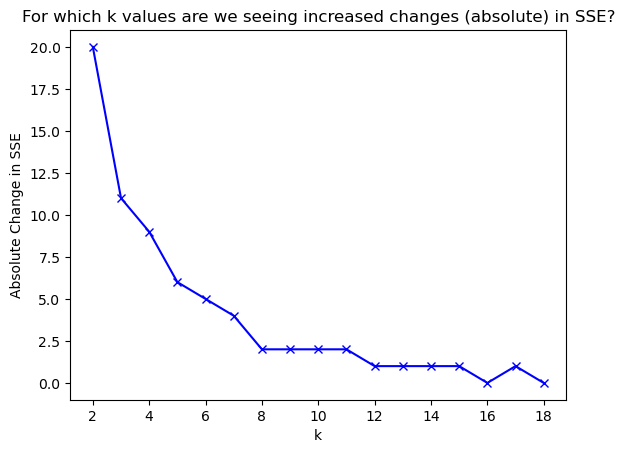

k        sse  delta  pct_delta
0    2  77.885441   20.0       25.3
1    3  58.146224   11.0       19.4
2    4  46.856724    9.0       19.0
3    5  37.950437    6.0       14.5
4    6  32.435278    5.0       15.6
5    7  27.367949    4.0       13.7
6    8  23.624799    2.0       10.5
7    9  21.152749    2.0       10.8
8   10  18.860292    2.0       11.1
9   11  16.761623    2.0        9.5
10  12  15.171452    1.0        7.6
11  13  14.021107    1.0        7.1
12  14  13.021636    1.0        5.3
13  15  12.328475    1.0        5.1
14  16  11.698786    0.0        4.1
15  17  11.222499    1.0        6.5
16  18  10.491181    0.0        4.6

In [76]:
cluster_vars = ['pH', 'density', 'sulphates']
cluster_name = 'q_cluster'
k_range = range(2,20)

find_k(X[0], cluster_vars, k_range)


In [77]:
k=5
cluster_name = 'q_cluster'
cluster_vars = ['pH', 'scaled_density', 'scaled_sulphates']

# fit kmeans 
kmeans = create_clusters(X[0], k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)


In [78]:
X_train = X[0].iloc[:,0:27]
X_validate = X[1].iloc[:,0:27]
X_test = X[2].iloc[:,0:27]

In [79]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'is_red', 'scaled_alcohol',
       'scaled_volatile acidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_free sulfur dioxide', 'quality_cluster',
       'centroid_scaled_chlorides', 'centroid_scaled_alcohol',
       'centroid_scaled_volatile acidity', 'q_cluster', 'centroid_pH',
       'centroid_scaled_density', 'centroid_scaled_sulphates'],
      dtype='object')

# Regular features 

X_train = X_train[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH', 'is_red_0', 'is_red_1', 'alcohol',
       'volatile acidity', 'sulphates', 'density',
       'chlorides', 'free sulfur dioxide']]

X_validate = X_validate[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH', 'is_red_0', 'is_red_1', 'alcohol',
       'volatile acidity', 'sulphates', 'density',
       'chlorides', 'free sulfur dioxide']]

X_test = X_test[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH', 'is_red_0', 'is_red_1', 'alcohol',
       'volatile acidity', 'sulphates', 'density',
       'chlorides', 'free sulfur dioxide']]

# Scaled features

In [80]:
X_train = X_train[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH', 'is_red', 'scaled_alcohol',
       'scaled_volatile acidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_free sulfur dioxide']]

In [81]:
X_validate = X_validate[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH', 'is_red', 'scaled_alcohol',
       'scaled_volatile acidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_free sulfur dioxide']]

In [82]:
X_test = X_test[['fixed acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide',
       'pH','is_red', 'scaled_alcohol',
       'scaled_volatile acidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_free sulfur dioxide']]

# Select features on correlations 

X_validate = X_validate[['density','alcohol','chlorides','volatile acidity']]
X_test = X_test[['density','alcohol','chlorides','volatile acidity']]
X_train = X_train[['density','alcohol','chlorides','volatile acidity']]

# Clusters only below

X_train = X_train[['quality_cluster','centroid_scaled_chlorides', 'centroid_scaled_alcohol','centroid_scaled_volatile acidity', 'q_cluster', 'centroid_pH','centroid_scaled_density', 'centroid_scaled_sulphates']]

X_validate = X_validate[['quality_cluster','centroid_scaled_chlorides', 'centroid_scaled_alcohol','centroid_scaled_volatile acidity', 'q_cluster', 'centroid_pH','centroid_scaled_density', 'centroid_scaled_sulphates']]

X_test = X_test[['quality_cluster','centroid_scaled_chlorides', 'centroid_scaled_alcohol','centroid_scaled_volatile acidity', 'q_cluster', 'centroid_pH','centroid_scaled_density', 'centroid_scaled_sulphates']]

pd.DataFrame(X[0].groupby(['q_cluster', 'centroid_scaled_density', 'centroid_scaled_sulphates', 
                           'centroid_pH'])['q_cluster'].count())


#update datatypes of binned values to be category
X_train = X_train.astype({'quality_cluster': 'category', 'q_cluster': 'category'})
X_validate = X_validate.astype({'quality_cluster': 'category', 'q_cluster': 'category'})
X_test = X_test.astype({'quality_cluster': 'category', 'q_cluster': 'category'})

dummy_df = pd.get_dummies(X_train[['quality_cluster','q_cluster']], dummy_na=False, drop_first=[True, True])
append dummy df cols to the original df. 
X_train = pd.concat([X_train, dummy_df], axis=1)


dummy_df = pd.get_dummies(X_validate[['quality_cluster','q_cluster']], dummy_na=False, drop_first=[True, True])
X_validate = pd.concat([X_validate, dummy_df], axis=1)

dummy_df = pd.get_dummies(X_test[['quality_cluster','q_cluster']], dummy_na=False, drop_first=[True, True])
X_test = pd.concat([X_test, dummy_df], axis=1)

plt.scatter(X_train.alcohol, X_train.sulphates, c = X_train.quality_cluster)


In [83]:
#X_train.groupby(['quality_cluster', 'q_cluster'])['pH'].describe()


In [84]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict quality_pred_mean
quality_pred_mean = y_train['quality'].mean()
y_train['quality_pred_mean'] = quality_pred_mean
y_validate['quality_pred_mean'] = quality_pred_mean

# 2. compute quality_pred_median
quality_pred_median = y_train['quality'].median()
y_train['quality_pred_median'] = quality_pred_median
y_validate['quality_pred_median'] = quality_pred_median

# 3. RMSE of quality_pred_mean
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of quality_pred_median
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)


RMSE using Mean
Train/In-Sample:  0.8443623923662017 
Validate/Out-of-Sample:  0.8544712462138014
RMSE using Median
Train/In-Sample:  0.8689432117785086 
Validate/Out-of-Sample:  0.8817454409899891


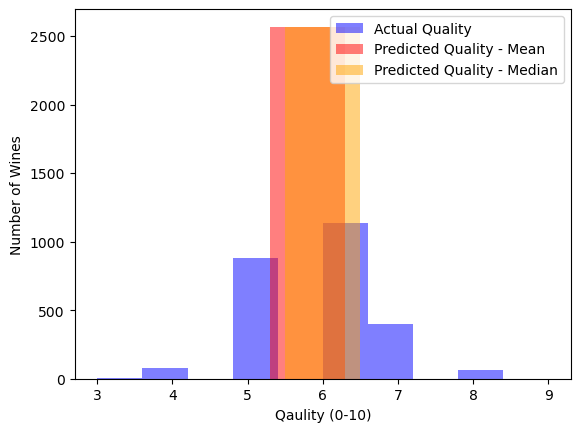

In [85]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.quality, color='blue', alpha=.5, label="Actual Quality")
plt.hist(y_train.quality_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Quality - Mean")
plt.hist(y_train.quality_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Quality - Median")
plt.xlabel("Qaulity (0-10)")
plt.ylabel("Number of Wines")
plt.legend()
plt.show()


In [86]:
# create the model object
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_lm'] = lm.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm)**(1/2)
# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm)**(1/2)
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  0.696288173521316 
Validation/Out-of-Sample:  0.712095711568797


In [87]:
# create the model object
lars = LassoLars(alpha=1.0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_lars'] = lars.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lars)**(1/2)
# predict validate
y_validate['quality_pred_lars'] = lars.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  0.8443623923662017 
Validation/Out-of-Sample:  0.8544712462138014


In [88]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_glm'] = glm.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_glm)**(1/2)
# predict validate
y_validate['quality_pred_glm'] = glm.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.6963106808769866 
Validation/Out-of-Sample:  0.7136247366053334


In [89]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.quality)
# predict train
y_train['quality_pred_lm2'] = lm2.predict(X_train_degree2)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm2)**(1/2)
# predict validate
y_validate['quality_pred_lm2'] = lm2.predict(X_validate_degree2)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.6437062199565614 
Validation/Out-of-Sample:  0.8168776510970843


In [90]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [91]:
# create the model object
R = Ridge()
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
R.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_R'] = R.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_R)**(1/2)
# predict validate
y_validate['quality_pred_R'] = R.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_R)**(1/2)

print("RMSE for R using Ridge \nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for R using Ridge 
Training/In-Sample:  0.696478653476449 
Validation/Out-of-Sample:  0.7109265884494571


In [92]:
# create the model object
svr = SVR()
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
svr.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_svr'] = svr.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_svr)**(1/2)
# predict validate
y_validate['quality_pred_svr'] = svr.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_svr)**(1/2)

print("RMSE for svr using SVR \nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for svr using SVR 
Training/In-Sample:  0.8455889157436476 
Validation/Out-of-Sample:  0.8555495275934092


# Evaluate

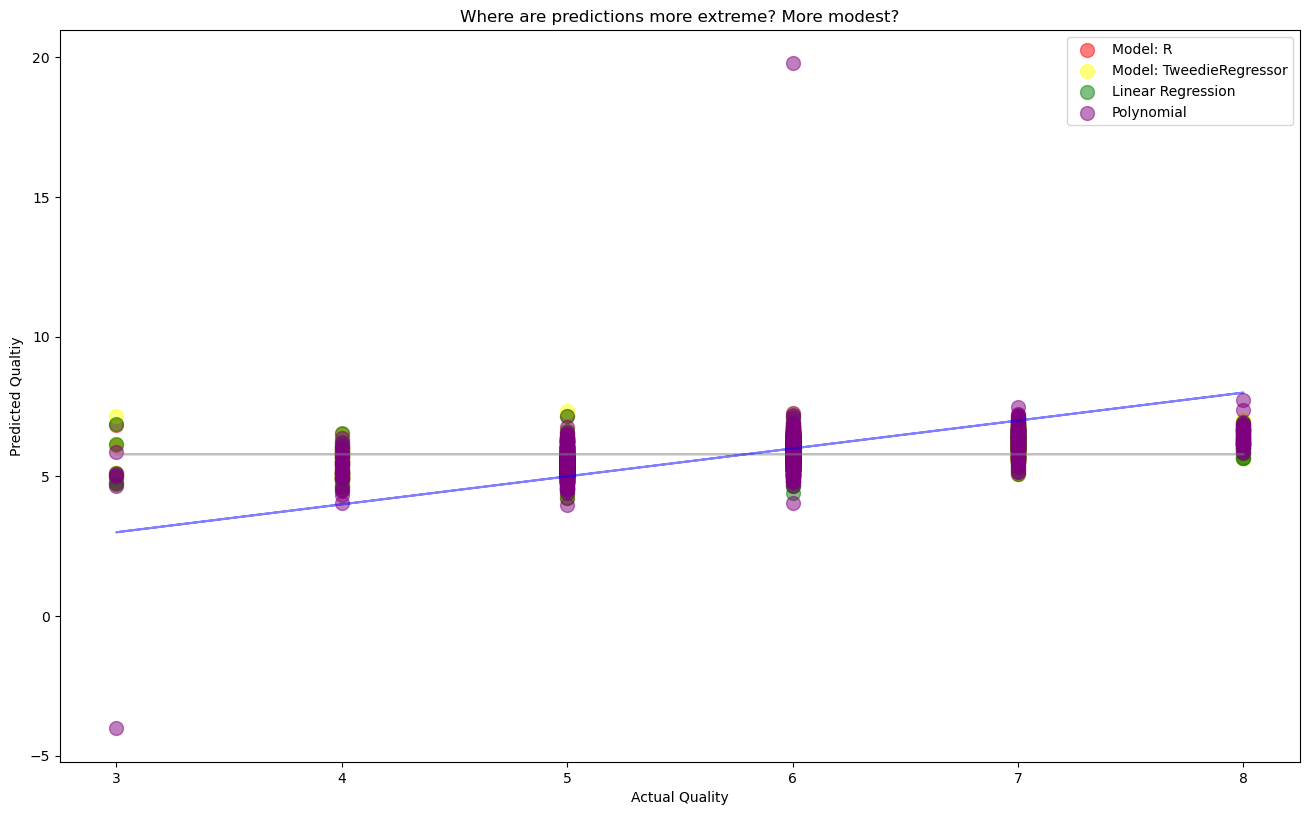

In [93]:
# y_validate.head()
plt.figure(figsize=(16,9.5))
plt.plot(y_validate.quality, y_validate.quality_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.quality, y_validate.quality, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.quality, y_validate.quality_pred_R, 
            alpha=.5, color="red", s=100, label="Model: R")
plt.scatter(y_validate.quality, y_validate.quality_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm, 
            alpha=.5, color="green", s=100, label="Linear Regression")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm2, 
            alpha=.5, color="purple", s=100, label="Polynomial")   
    
plt.legend()
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Qualtiy")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


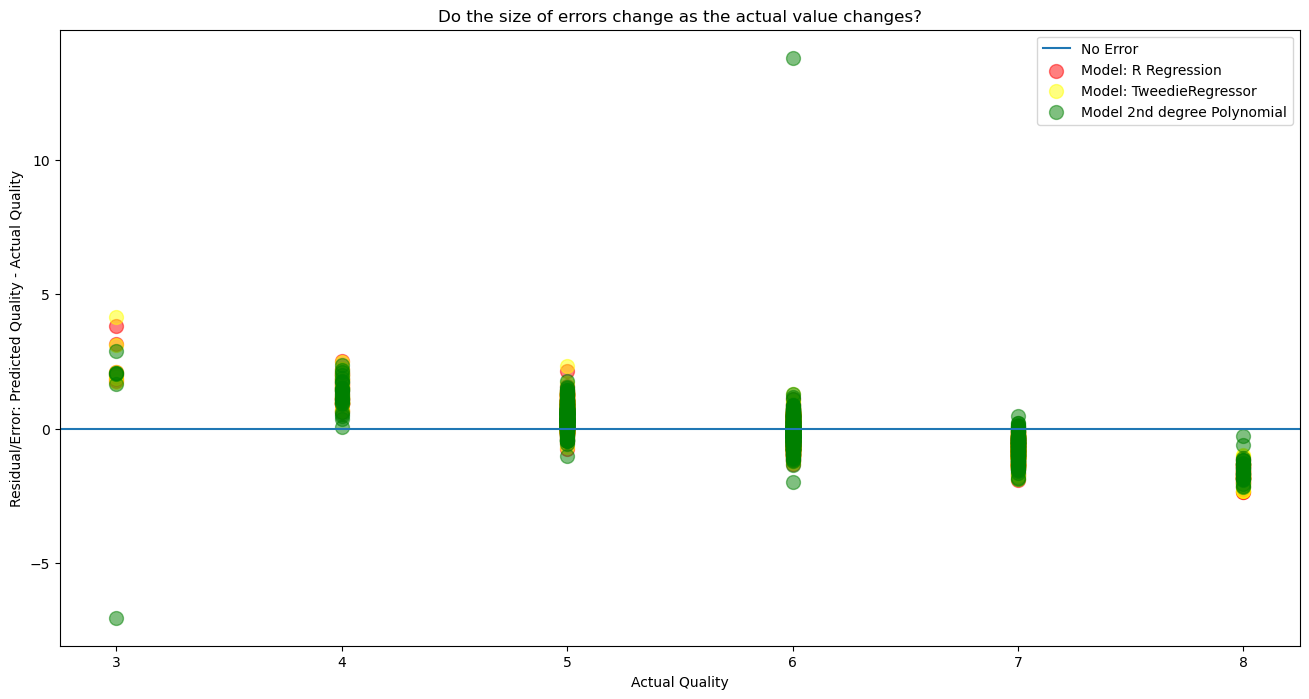

In [94]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.quality, y_validate.quality_pred_R-y_validate.quality, 
            alpha=.5, color="red", s=100, label="Model: R Regression")
plt.scatter(y_validate.quality, y_validate.quality_pred_glm-y_validate.quality, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm2-y_validate.quality, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Quality")
plt.ylabel("Residual/Error: Predicted Quality - Actual Quality")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


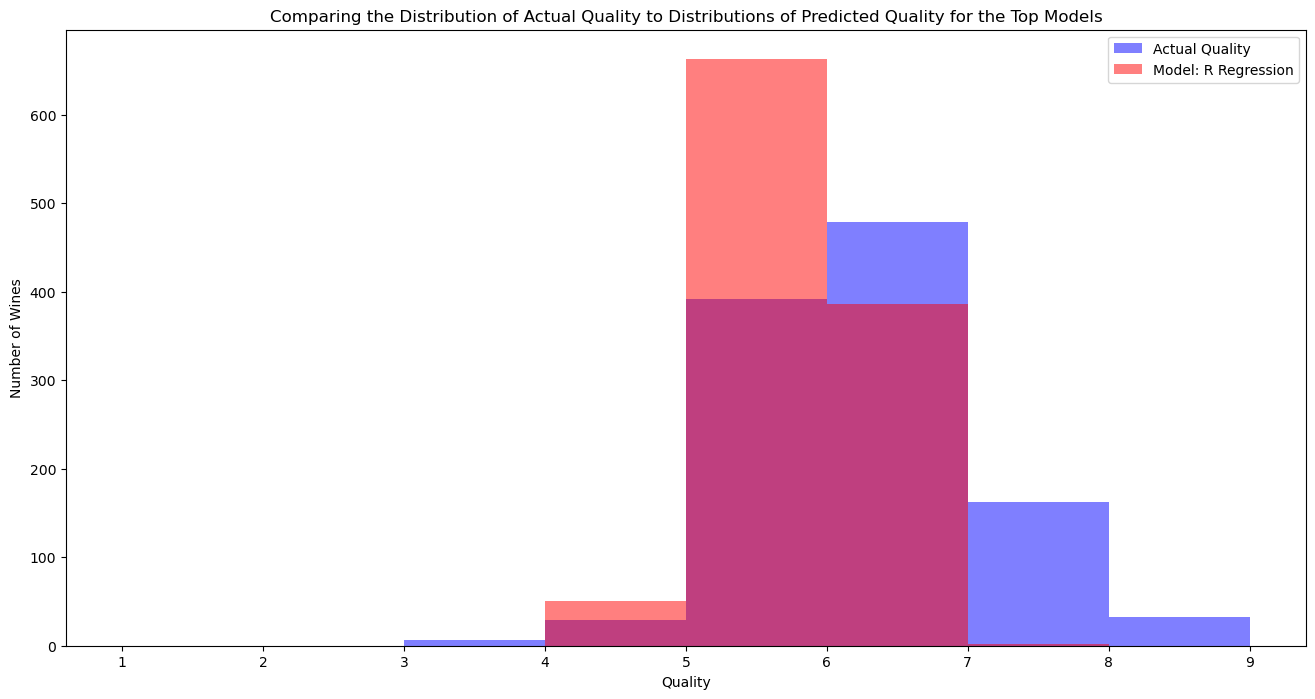

In [105]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.quality, color='blue', alpha=.5, label="Actual Quality", bins=range(1,10))
plt.hist(y_validate.quality_pred_R, color='red', alpha=.5, label="Model: R Regression", bins=range(1,10))
#plt.hist(y_validate.quality_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
#plt.hist(y_validate.quality_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.title("Comparing the Distribution of Actual Quality to Distributions of Predicted Quality for the Top Models")
plt.legend()
plt.show()


In [96]:
y_test = pd.DataFrame(y_test)
# predict on test
y_test['quality_pred_R'] = R.predict(X_test)
y_test['quality_pred_R'] = y_test['quality_pred_R']
# evaluate: rmse
rmse_test = mean_squared_error(y_test.quality, y_test.quality_pred_R)**(1/2)
print("RMSE for OLS Model using Ridge Regression\nOut-of-Sample Performance: ", rmse_test)


RMSE for OLS Model using Ridge Regression
Out-of-Sample Performance:  0.6918303183802249


In [97]:
y_test['quality_pred_R'] =  y_test.quality_pred_R

In [98]:
y_test

quality  quality_pred_R
248         6        5.311456
174         5        5.409830
3620        7        6.496937
3733        6        6.673213
2195        5        5.195192
...       ...             ...
637         5        4.670294
3928        5        5.471991
4076        5        5.695433
80          5        5.257120
3168        6        6.590473

[918 rows x 2 columns]

In [99]:
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean)**(1/2)
lm_base_ratio = (rmse_test/rmse_validate)*100
print(f"""Ridge Model decreased errors by {round(100-lm_base_ratio,2)}%""")

Ridge Model decreased errors by 19.03%
